**<h2> DATA MANIPULATION & NAIVE BAYES CLASSIFIER WITH FLIGHTS DATESET <h2>**

<h3>

By [*Chris Le*](https://www.linkedin.com/in/hdang-le3107/)

<h3>

The aviation industry is dynamic with various variables impacting flight operations. A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport):

This project seeks to analyze the `flights2022.csv` dataset containing *111,006* flight records and *29* fields.

The project consists of two parts:


<h3>
I. Data Manipulation, EDA and Visualizations <br>

II. Naive Bayes Classifier to Predict Flight Cancellations
<h3>

##### `flights2022.csv`

Contains information about each flight, including:


| **Column**           | **Data Type** | **Description**                                                                                                 | **Example Values**                 |
|----------------------|---------------|-----------------------------------------------------------------------------------------------------------------|------------------------------------|
| **year**             | int64         | Calendar year of the flight.                                                                                    | 2022                               |
| **month**            | int64         | Month of the flight (1–12).                                                                                     | 1, 2, ..., 12                      |
| **day**              | int64         | Day of the month (1–31).                                                                                        | 1, 2, 3, ...                       |
| **dep_time**         | float64       | Actual departure time in “HHMM” format (no colon). NA = cancelled flight. For example, 1.0 means 00:01, 2359 means 23:59.              | 1.0, 10.0, 25.0, 1305.0            |
| **sched_dep_time**   | int64         | Scheduled departure time in “HHMM” format.                                                                      | 2359, 2250, 2355                   |
| **dep_delay**        | float64       | Departure delay in minutes. Positive values = minutes late, negative = minutes early, zero = on time.           | 2.0, 71.0, 15.0                    |
| **arr_time**         | float64       | Actual arrival time in “HHMM” format (float).                                                                   | 604.0, 242.0, 759.0                |
| **sched_arr_time**   | int64         | Scheduled arrival time in “HHMM” format.                                                                        | 618, 142, 730                      |
| **arr_delay**        | float64       | Arrival delay in minutes. Positive = late arrival, negative = early arrival.                                    | -14.0, 60.0, 29.0                  |
| **carrier**          | object        | Two-letter airline carrier code.                                                                                | "UA", "AS", "AA"                   |
| **flight**           | int64         | Flight number assigned by the carrier.                                                                          | 1545, 15, 43                       |
| **tailnum**          | object        | Aircraft tail number (unique plane identifier).                                                                 | "N738MA", "N419AS"                 |
| **origin**           | object        | Origin airport where flight starts (IATA code).                                                                  | "JFK", "LGA", "EWR"                |
| **dest**             | object        | Destination airport where flight lands (IATA code).                                                                                      | "SEA", "SFO", "ORD"                |
| **air_time**         | float64       | Flight time in the air (minutes).                                                                               | 300.0, 200.0, etc.                 |
| **distance**         | int64         | Distance between airports (miles).                                                                              | 250, 800, 2475                     |
| **hour**             | int64         | Extracted hour portion of scheduled departure time (0–23).                                                      | 23, 22, etc.                       |
| **minute**           | int64         | Extracted minute portion of scheduled departure time (0–59).                                                    | 59, 50, etc.                       |
| **time_hour**        | object        | Date/Time Recorded.                              | "2022-01-01 23:00:00"              |
| **airline**          | object        | Carrier/airline name.                                                                                              | "United Air Lines Inc.", "Alaska Airlines Inc." |
| **temp**             | float64       | Recorded temperature (in Fahrenheit) at the origin airport (from weather data).                                 | 33.0, 32.0, etc.                   |
| **dewp**             | float64       | Dew Point Temperature (in degrees Fahrenheit).                                                                             | 23.0, 19.0, etc.                   |
| **humid**            | float64       | Relative humidity percentage.                                                                                 | 66.06, 69.04, etc.                 |
| **wind_dir**         | float64       | Wind direction (in degrees, 0–360).                                                                             | 160.0, 170.0, etc.                 |
| **wind_speed**       | float64       | Wind speed (in mph).                                                                                            | 8.05546, 9.20624, etc.             |
| **wind_gust**        | float64       | Wind gust speed (in mph).                                                                                       | 9.270062, 10.594357, etc.          |
| **precip**           | float64       | Precipitation (in inches) recorded at departure airport.                                                        | 0.0, 0.5, etc.                     |
| **pressure**         | float64       | Atmospheric Pressure (in hPa).                                                                      | 1022.9, 1023.4, etc.               |
| **visib**            | float64       | Visibility (in miles).                                                                                          | 10.0, 4.0, etc.                    |




**<h3> `I. Handling NAs` <h3>**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [53]:
pd.set_option('display.max_columns', None)

In [54]:
df = pd.read_csv("flights2022.csv")
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,366,N625JB,PDX,JFK,269.0,2454,23,52,2022-01-01T23:00:00Z,JetBlue Airways,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022,1,1,104.0,43,21.0,936.0,930,6.0,AA,501,N413AN,SEA,MIA,312.0,2724,0,43,2022-01-01T00:00:00Z,American Airlines Inc.,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,607,N444QX,SEA,PSC,32.0,172,22,51,2022-01-01T22:00:00Z,Horizon Air,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022,1,1,142.0,2305,157.0,900.0,657,123.0,UA,780,N37419,SEA,IAD,240.0,2306,23,5,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022,1,1,255.0,2355,180.0,831.0,549,162.0,UA,784,N429UA,SEA,ORD,189.0,1721,23,55,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


In [55]:
num_rows = len(df)
print(f"Number of rows: {num_rows}")

Number of rows: 111006


In [56]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          2440
sched_dep_time       0
dep_delay         2440
arr_time          2537
sched_arr_time       0
arr_delay         2674
carrier              0
flight               0
tailnum            128
origin               0
dest                 0
air_time          2674
distance             0
hour                 0
minute               0
time_hour            0
airline              0
temp                 0
dewp                 0
humid                0
wind_dir          3163
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

In [57]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Sort values in descending order and format to 2 decimal places
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage_formatted = missing_percentage_sorted.apply(lambda x: f"{x:.2f}%")

print("Percentage of missing values per column:")
print(missing_percentage_formatted)

Percentage of missing values per column:
wind_dir      2.85%
arr_delay     2.41%
air_time      2.41%
arr_time      2.29%
dep_time      2.20%
dep_delay     2.20%
wind_speed    0.25%
wind_gust     0.25%
tailnum       0.12%
dtype: object


+ For dep_time, NAs represent "cancelled" flights so we don't have to worry about them 
+ dep_time is associated with dep_delay so the matching NAs makes sense
+ Since only relatively small amount of "tailnum" is missing, removing them is acceptable


In [58]:
# Remove records with blank (NA) in 'tailnum'
df = df[df['tailnum'].notna()]

In [59]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          2312
sched_dep_time       0
dep_delay         2312
arr_time          2409
sched_arr_time       0
arr_delay         2546
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          2546
distance             0
hour                 0
minute               0
time_hour            0
airline              0
temp                 0
dewp                 0
humid                0
wind_dir          3161
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

In [60]:
# Find rows where dep_time is not NA but arr_time is NA
missing_arrivals = df[df['dep_time'].notna() & df['arr_time'].isna()]

# Display the count and the relevant columns
print(f"Number of flights with missing arrival times: {len(missing_arrivals)}")
print("\nSample of these flights:")
missing_arrivals.head(5)

Number of flights with missing arrival times: 97

Sample of these flights:


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
466,2022,1,1,2255.0,2125,90.0,NaN,2335,NaN,AS,456,N291BT,SEA,SFO,NaN,679,21,25,2022-01-01T21:00:00Z,Alaska Airlines Inc.,32.0,21.9,65.92,160.0,9.20624,10.594357,0.00,1023.7,10.0
1076,2022,1,2,2341.0,2253,48.0,NaN,2354,NaN,QX,603,N452QX,SEA,ALW,NaN,213,22,53,2022-01-02T22:00:00Z,Horizon Air,41.0,33.0,73.25,140.0,9.20624,10.594357,0.00,1006.1,7.0
1183,2022,1,3,658.0,700,-2.0,NaN,1301,NaN,UA,541,N75432,SEA,ORD,NaN,1721,7,0,2022-01-03T07:00:00Z,United Air Lines Inc.,36.0,34.0,92.35,110.0,12.65858,14.567241,0.07,998.3,7.0
1215,2022,1,3,758.0,755,3.0,NaN,936,NaN,AS,33,N644AS,SEA,JNU,NaN,909,7,55,2022-01-03T07:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,110.0,12.65858,14.567241,0.07,998.3,7.0
1297,2022,1,3,1030.0,900,90.0,NaN,1005,NaN,QX,723,N450QX,SEA,GEG,NaN,224,9,0,2022-01-03T09:00:00Z,Horizon Air,36.0,34.0,92.35,170.0,5.75390,6.621473,0.02,997.9,7.0


air_time, arr_time and arr_delay missing seems to have no pattern. Since only a small fraction is missing, it's reasonable to assume that there is a lag and the data wasn't updated timely. They wouldn't be used for modelling so it's fine to keep them as they are

In [61]:
# Display count of missing wind_dir_time and investigate those records
missing_windir_time = df[df['wind_dir'].isna()]
print(f"Number of flights with missing wind direction: {len(missing_windir_time)}")
print("\nSample of flights with missing wind direction:")
missing_windir_time.head(5)

Number of flights with missing wind direction: 3161

Sample of flights with missing wind direction:


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1135,2022,1,3,56.0,2300,116.0,846.0,703,103.0,UA,743,N27421,PDX,EWR,260.0,2434,23,0,2022-01-03T23:00:00Z,United Air Lines Inc.,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1140,2022,1,3,128.0,2359,89.0,651.0,605,46.0,UA,849,N38459,PDX,IAH,187.0,1825,23,59,2022-01-03T23:00:00Z,United Air Lines Inc.,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1141,2022,1,3,133.0,2352,101.0,913.0,758,75.0,B6,366,N569JB,PDX,JFK,263.0,2454,23,52,2022-01-03T23:00:00Z,JetBlue Airways,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1277,2022,1,3,956.0,1000,-4.0,1224.0,1232,-8.0,AS,427,N291BT,SEA,LAS,115.0,867,10,0,2022-01-03T10:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,NaN,3.45234,3.972884,0.12,997.8,6.0
1283,2022,1,3,1015.0,1014,1.0,1353.0,1354,-1.0,AS,230,N248AK,SEA,DEN,124.0,1024,10,14,2022-01-03T10:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,NaN,3.45234,3.972884,0.12,997.8,6.0


In [62]:
from sklearn.impute import KNNImputer
import numpy as np

# Select columns needed for imputation
weather_cols = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']
weather_data = df[weather_cols].copy()

# Create KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

# Fit and transform the data
weather_imputed = imputer.fit_transform(weather_data)

# Create a DataFrame with imputed values
weather_imputed_df = pd.DataFrame(weather_imputed, columns=weather_cols, index=df.index)

# Update the original dataframe with imputed values
df['wind_dir'] = weather_imputed_df['wind_dir']
df['wind_speed'] = weather_imputed_df['wind_speed']
df['wind_gust'] = weather_imputed_df['wind_gust']

# Verify imputation
print("Missing values after KNN imputation:")
print(df[weather_cols].isna().sum())

Missing values after KNN imputation:
temp          0
dewp          0
humid         0
wind_dir      0
wind_speed    0
wind_gust     0
precip        0
pressure      0
visib         0
dtype: int64


In [63]:
# Check for the number of rows after imputation, should be 111,006 - 128 = 110,878
len(df)

110878

**<h3> `II. Fixing Time Format` <h3>**

Exploring the data, we see that dep_time, sched_dep_time, arr_time, sched_dep_time need to be transformed for furthur analysis

#TODO:
+ transform float -> HHMM format -> datetype
+ date inconsistency between dep_time and sched_dep_time for values near day transitions
+ date inconsistency between arr_time and sched_arr_time for values near day transitions

Reason: only one set of (year, month, day) in the data, while dep_datetime and arr_datetime can be on two different dates, similarly for sched_dep_datetime and sched_arr_datetime 
+ -> to deal with this, we assume the set of date belongs to sched_dep. Using sched_dep as the base, we transform the rest as needed based on air_time, dep_delay, arr_delay


In [64]:
df[['dep_time', 'sched_dep_time', 'dep_delay', 'year', 'month', 'day']].head(5)

,dep_time,sched_dep_time,dep_delay,year,month,day
0,1.0,2359,2.0,2022,1,1
1,1.0,2250,71.0,2022,1,1
2,10.0,2355,15.0,2022,1,1
3,25.0,2350,35.0,2022,1,1
4,35.0,2349,46.0,2022,1,1


Looking at the portion above, for the first record, we can see the dep_time and sched_dep_time don't make sense as they shouldn't occur on the same date. The dep_delay is 2 minutes, and the flight's scheduled departure is recorded to be 23:59 Jan 1, meaning the dep_time should actually 1 day after, 00:01 Jan 2 2022

In [65]:
df[df['dep_time'] >= 2400][['dep_time', 'sched_dep_time', 'dep_delay','year', 'month', 'day']].head(5)

,dep_time,sched_dep_time,dep_delay,year,month,day
1086,2400.0,2246,74.0,2022,1,2
3354,2400.0,2253,67.0,2022,1,6
4553,2400.0,2150,130.0,2022,1,8
25932,2400.0,2359,1.0,2022,2,15
27087,2400.0,2359,1.0,2022,2,17


Additionally, these records above also need transformations, as dep_time of 24:00 should be written as 00:00 the day after. This problem seems to only occur when dep_time lands exactly when day changes

First, let's reformat the int date columns into datetime and handle the 2400 by increasing 1 day

In [66]:
# Create base datetime column from year, month, day
df['date'] = pd.to_datetime(
    df[['year', 'month', 'day']]
    .join(pd.Series(1, index=df.index, name='hour'))
)

# Function to convert HHMM to datetime
def hhmm_to_datetime(row, time_col):
    if pd.isna(row[time_col]):
        return pd.NaT

    # Convert HHMM to hours and minutes
    time_str = str(int(float(row[time_col]))).zfill(4)
    hours = int(time_str[:2])
    minutes = int(time_str[2:])

    # Get the base date from the row
    date = pd.to_datetime(row['date'])

    # Handle 24:00 times
    if hours >= 24:
        hours -= 24
        date += pd.Timedelta(days=1)

    # Create datetime using the adjusted date
    return date.replace(hour=hours, minute=minutes)

# Create datetime columns for time fields
time_columns = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']
for col in time_columns:
    df[f'{col}_datetime'] = df.apply(lambda row: hhmm_to_datetime(row, col), axis=1)

print("Sample of new time-based columns:")
display(
    df[
        [
            'air_time',
            'dep_time_datetime',
            'sched_dep_time_datetime',
            'arr_time_datetime',
            'sched_arr_time_datetime',
            'arr_delay',
            'dep_delay',
            'year',
            'month',
            'day',
            'dep_time',
            'sched_dep_time',
            'arr_time',
            'sched_arr_time',
        ]
    ].head(10)
)

Sample of new time-based columns:


,air_time,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime,arr_delay,dep_delay,year,month,day,dep_time,sched_dep_time,arr_time,sched_arr_time
0,221.0,2022-01-01 00:01:00,2022-01-01 23:59:00,2022-01-01 06:04:00,2022-01-01 06:18:00,-14.0,2.0,2022,1,1,1.0,2359,604.0,618
1,193.0,2022-01-01 00:01:00,2022-01-01 22:50:00,2022-01-01 02:42:00,2022-01-01 01:42:00,60.0,71.0,2022,1,1,1.0,2250,242.0,142
2,261.0,2022-01-01 00:10:00,2022-01-01 23:55:00,2022-01-01 07:59:00,2022-01-01 07:30:00,29.0,15.0,2022,1,1,10.0,2355,759.0,730
3,193.0,2022-01-01 00:25:00,2022-01-01 23:50:00,2022-01-01 06:06:00,2022-01-01 05:50:00,16.0,35.0,2022,1,1,25.0,2350,606.0,550
4,196.0,2022-01-01 00:35:00,2022-01-01 23:49:00,2022-01-01 06:16:00,2022-01-01 05:45:00,31.0,46.0,2022,1,1,35.0,2349,616.0,545
5,269.0,2022-01-01 00:51:00,2022-01-01 23:52:00,2022-01-01 08:40:00,2022-01-01 07:58:00,42.0,59.0,2022,1,1,51.0,2352,840.0,758
6,312.0,2022-01-01 01:04:00,2022-01-01 00:43:00,2022-01-01 09:36:00,2022-01-01 09:30:00,6.0,21.0,2022,1,1,104.0,43,936.0,930
7,32.0,2022-01-01 01:31:00,2022-01-01 22:51:00,2022-01-01 02:16:00,2022-01-01 23:47:00,149.0,160.0,2022,1,1,131.0,2251,216.0,2347
8,240.0,2022-01-01 01:42:00,2022-01-01 23:05:00,2022-01-01 09:00:00,2022-01-01 06:57:00,123.0,157.0,2022,1,1,142.0,2305,900.0,657
9,189.0,2022-01-01 02:55:00,2022-01-01 23:55:00,2022-01-01 08:31:00,2022-01-01 05:49:00,162.0,180.0,2022,1,1,255.0,2355,831.0,549


To address the day transition issue, we need to come up logic that covers all cases
+ Find out when dep_time is 1 day after sched_dep_time
+ Find out when arr_time is 1 day after sched_dep_time
+ Find out when shced_arr_time is 1 day after sched_dep_time

To do this, we use 
+ dep_delay to refer to dep_time from sched_dep_time as base (1 cond)
+ arr_delay and air_time to refer to arr_time from sched_arr_time as base (2 conds)
+ air_time to refer to sched_arr_time from sched_dep_time as base (1 cond)

E.g:
+ Convert actual datetime into minutes, for example, 2022-01-01 00:01:00 = 60 (minutes)
+ Compare datetime to delay
+ If actual datetime < delay, e.g 01:00:00 but delay 62 min, increase actual datetime by 1 (the day after)


In [67]:
# Adjust departure time 
# Extract hours and minutes from dep datetime and convert to total minutes

mask1 = df['dep_delay'] > df['dep_time_datetime'].dt.hour * 60 + df['dep_time_datetime'].dt.minute
df.loc[mask1, 'dep_time_datetime'] = df.loc[mask1, 'dep_time_datetime'] + pd.Timedelta(days=1)

# Adjust arrival time
# Extract hours and minutes from arr datetime and convert to total minutes

mask2 = (df['arr_delay'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['air_time'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['arr_time_datetime'] < df['dep_time_datetime'])
df.loc[mask2, 'arr_time_datetime'] = df.loc[mask2, 'arr_time_datetime'] + pd.Timedelta(days=1)

# # Adjust scheduled arrival time
# # Extract hours and minutes from sched arr datetime and convert to total minutes

mask3 = (df['air_time'] > df['sched_arr_time_datetime'].dt.hour * 60 + df['sched_arr_time_datetime'].dt.minute) | (df['sched_arr_time_datetime'] < df['sched_dep_time_datetime'])
df.loc[mask3, 'sched_arr_time_datetime'] = df.loc[mask3, 'sched_arr_time_datetime'] + pd.Timedelta(days=1)

# # Adjust arrival time
# Extract hours and minutes from sched arr datetime and convert to total minutes

# mask4 = df['air_time'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute
# df.loc[mask4, 'arr_time_datetime'] = df.loc[mask4, 'arr_time_datetime'] + pd.Timedelta(days=1)


Departure Time Transformation

In [68]:
df[df['dep_delay'] > df['dep_time_datetime'].dt.hour * 60 + df['dep_time_datetime'].dt.minute][['dep_time_datetime', 'sched_dep_time_datetime', 'dep_delay', 'date', 'year', 'month', 'day']]

,dep_time_datetime,sched_dep_time_datetime,dep_delay,date,year,month,day
0,2022-01-02 00:01:00,2022-01-01 23:59:00,2.0,2022-01-01 01:00:00,2022,1,1
1,2022-01-02 00:01:00,2022-01-01 22:50:00,71.0,2022-01-01 01:00:00,2022,1,1
2,2022-01-02 00:10:00,2022-01-01 23:55:00,15.0,2022-01-01 01:00:00,2022,1,1
3,2022-01-02 00:25:00,2022-01-01 23:50:00,35.0,2022-01-01 01:00:00,2022,1,1
4,2022-01-02 00:35:00,2022-01-01 23:49:00,46.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...
110366,2022-06-30 14:18:00,2022-06-29 22:15:00,963.0,2022-06-29 01:00:00,2022,6,29
110660,2022-07-01 00:01:00,2022-06-30 21:35:00,146.0,2022-06-30 01:00:00,2022,6,30
110661,2022-07-01 00:01:00,2022-06-30 23:32:00,29.0,2022-06-30 01:00:00,2022,6,30
110664,2022-07-01 00:17:00,2022-06-30 23:59:00,18.0,2022-06-30 01:00:00,2022,6,30


Arrival Time Transformation

In [69]:
df[(df['arr_delay'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['air_time'] > df['arr_time_datetime'].dt.hour * 60 + df['arr_time_datetime'].dt.minute) | (df['arr_time_datetime'] < df['dep_time_datetime'])][['arr_time_datetime', 'sched_arr_time_datetime', 'arr_delay', 'dep_time_datetime', 'sched_dep_time_datetime', 'dep_delay', 'air_time','date', 'year', 'month', 'day']]

,arr_time_datetime,sched_arr_time_datetime,arr_delay,dep_time_datetime,sched_dep_time_datetime,dep_delay,air_time,date,year,month,day
1,2022-01-02 02:42:00,2022-01-02 01:42:00,60.0,2022-01-02 00:01:00,2022-01-01 22:50:00,71.0,193.0,2022-01-01 01:00:00,2022,1,1
7,2022-01-02 02:16:00,2022-01-01 23:47:00,149.0,2022-01-02 01:31:00,2022-01-01 22:51:00,160.0,32.0,2022-01-01 01:00:00,2022,1,1
112,2022-01-02 14:30:00,2022-01-01 20:16:00,1094.0,2022-01-02 08:55:00,2022-01-01 14:21:00,1114.0,188.0,2022-01-01 01:00:00,2022,1,1
306,2022-01-02 00:52:00,2022-01-01 23:59:00,53.0,2022-01-01 15:47:00,2022-01-01 15:35:00,12.0,314.0,2022-01-01 01:00:00,2022,1,1
332,2022-01-02 00:16:00,2022-01-01 23:58:00,18.0,2022-01-01 16:24:00,2022-01-01 16:15:00,9.0,271.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
110642,2022-06-30 00:17:00,2022-06-30 00:18:00,-1.0,2022-06-29 23:26:00,2022-06-29 23:30:00,-4.0,25.0,2022-06-29 01:00:00,2022,6,29
110643,2022-06-30 01:51:00,2022-06-30 02:02:00,-11.0,2022-06-29 23:30:00,2022-06-29 23:30:00,0.0,182.0,2022-06-29 01:00:00,2022,6,29
110645,2022-06-30 01:38:00,2022-06-30 00:15:00,83.0,2022-06-29 23:40:00,2022-06-29 22:10:00,90.0,100.0,2022-06-29 01:00:00,2022,6,29
110660,2022-07-01 01:42:00,2022-06-30 23:20:00,142.0,2022-07-01 00:01:00,2022-06-30 21:35:00,146.0,83.0,2022-06-30 01:00:00,2022,6,30


Scheduled Arrival Time Transformation

In [70]:
df[df['air_time'] > df['sched_arr_time_datetime'].dt.hour * 60 + df['sched_arr_time_datetime'].dt.minute][['dep_time_datetime', 'sched_dep_time_datetime','arr_time_datetime', 'sched_arr_time_datetime', 'air_time','arr_delay', 'dep_delay', 'date', 'year', 'month', 'day']]

,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime,air_time,arr_delay,dep_delay,date,year,month,day
1,2022-01-02 00:01:00,2022-01-01 22:50:00,2022-01-02 02:42:00,2022-01-02 01:42:00,193.0,60.0,71.0,2022-01-01 01:00:00,2022,1,1
434,2022-01-01 21:21:00,2022-01-01 21:18:00,2022-01-02 00:03:00,2022-01-02 00:08:00,199.0,-5.0,3.0,2022-01-01 01:00:00,2022,1,1
440,2022-01-01 21:34:00,2022-01-01 20:30:00,2022-01-02 01:09:00,2022-01-02 00:15:00,136.0,54.0,64.0,2022-01-01 01:00:00,2022,1,1
452,2022-01-01 22:22:00,2022-01-01 21:30:00,2022-01-02 01:07:00,2022-01-02 00:15:00,190.0,52.0,52.0,2022-01-01 01:00:00,2022,1,1
455,2022-01-01 22:37:00,2022-01-01 21:25:00,2022-01-02 01:35:00,2022-01-02 00:17:00,198.0,78.0,72.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...
110636,2022-06-29 23:08:00,2022-06-29 22:55:00,2022-06-30 01:25:00,2022-06-30 01:25:00,117.0,0.0,13.0,2022-06-29 01:00:00,2022,6,29
110642,2022-06-29 23:26:00,2022-06-29 23:30:00,2022-06-30 00:17:00,2022-06-30 00:18:00,25.0,-1.0,-4.0,2022-06-29 01:00:00,2022,6,29
110643,2022-06-29 23:30:00,2022-06-29 23:30:00,2022-06-30 01:51:00,2022-06-30 02:02:00,182.0,-11.0,0.0,2022-06-29 01:00:00,2022,6,29
110645,2022-06-29 23:40:00,2022-06-29 22:10:00,2022-06-30 01:38:00,2022-06-30 00:15:00,100.0,83.0,90.0,2022-06-29 01:00:00,2022,6,29


Final check to see if all the datetime makes sense

In [71]:
df[df['arr_time_datetime'] < df['dep_time_datetime']]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime
980,2022,1,2,1924.0,2352,1172.0,305.0,758,1147.0,B6,366,N644JB,PDX,JFK,261.0,2454,23,52,2022-01-02T23:00:00Z,JetBlue Airways,39.0,28.0,64.37,120.0,11.50780,13.242946,0.0001,1008.0,10.0,2022-01-02 01:00:00,2022-01-03 19:24:00,2022-01-02 23:52:00,2022-01-03 03:05:00,2022-01-03 07:58:00
1086,2022,1,2,2400.0,2246,74.0,732.0,655,37.0,B6,184,N967JT,SEA,BOS,256.0,2496,22,46,2022-01-02T22:00:00Z,JetBlue Airways,41.0,33.0,73.25,140.0,9.20624,10.594357,0.0000,1006.1,7.0,2022-01-02 01:00:00,2022-01-04 00:00:00,2022-01-02 22:46:00,2022-01-03 07:32:00,2022-01-03 06:55:00
3354,2022,1,6,2400.0,2253,67.0,122.0,2358,84.0,QX,720,N426QX,SEA,PUW,62.0,250,22,53,2022-01-06T22:00:00Z,Horizon Air,50.0,49.0,95.98,190.0,14.96014,17.215830,0.1100,1002.5,4.0,2022-01-06 01:00:00,2022-01-08 00:00:00,2022-01-06 22:53:00,2022-01-07 01:22:00,2022-01-06 23:58:00
4553,2022,1,8,2400.0,2150,130.0,110.0,2245,145.0,AS,437,N611AS,SEA,PDX,25.0,129,21,50,2022-01-08T21:00:00Z,Alaska Airlines Inc.,45.0,36.0,70.53,210.0,10.35702,11.918651,0.0000,1024.6,10.0,2022-01-08 01:00:00,2022-01-10 00:00:00,2022-01-08 21:50:00,2022-01-09 01:10:00,2022-01-08 22:45:00
10130,2022,1,18,1840.0,720,2120.0,223.0,1525,2098.0,AA,208,N939AN,SEA,CLT,260.0,2279,7,20,2022-01-18T07:00:00Z,American Airlines Inc.,45.0,43.0,92.65,180.0,11.50780,13.242946,0.0001,1016.5,3.0,2022-01-18 01:00:00,2022-01-19 18:40:00,2022-01-18 07:20:00,2022-01-19 02:23:00,2022-01-18 15:25:00
25932,2022,2,15,2400.0,2359,1.0,750.0,809,-19.0,B6,87,N945JT,SEA,JFK,276.0,2422,23,59,2022-02-15T23:00:00Z,JetBlue Airways,49.0,38.0,65.62,170.0,5.75390,6.621473,0.0000,1023.6,10.0,2022-02-15 01:00:00,2022-02-17 00:00:00,2022-02-15 23:59:00,2022-02-16 07:50:00,2022-02-16 08:09:00
27087,2022,2,17,2400.0,2359,1.0,819.0,830,-11.0,AA,360,N402AN,SEA,MIA,298.0,2724,23,59,2022-02-17T23:00:00Z,American Airlines Inc.,46.0,41.0,82.58,200.0,3.45234,3.972884,0.0000,1031.6,10.0,2022-02-17 01:00:00,2022-02-19 00:00:00,2022-02-17 23:59:00,2022-02-18 08:19:00,2022-02-18 08:30:00
33491,2022,2,28,2400.0,2359,1.0,833.0,830,3.0,AA,360,N120EE,SEA,MIA,307.0,2724,23,59,2022-02-28T23:00:00Z,American Airlines Inc.,53.0,52.0,96.03,200.0,14.96014,17.215830,0.1600,1012.5,1.5,2022-02-28 01:00:00,2022-03-02 00:00:00,2022-02-28 23:59:00,2022-03-01 08:33:00,2022-03-01 08:30:00
46292,2022,3,22,2044.0,2336,1268.0,457.0,742,1275.0,B6,178,N983JT,SEA,BOS,288.0,2496,23,36,2022-03-22T23:00:00Z,JetBlue Airways,52.0,49.0,89.13,310.0,4.60312,5.297178,0.0000,1020.8,10.0,2022-03-22 01:00:00,2022-03-23 20:44:00,2022-03-22 23:36:00,2022-03-23 04:57:00,2022-03-23 07:42:00
48803,2022,3,26,2400.0,2336,24.0,756.0,742,14.0,B6,178,N934JB,SEA,BOS,277.0,2496,23,36,2022-03-26T23:00:00Z,JetBlue Airways,49.0,45.0,86.33,350.0,4.60312,5.297178,0.0001,1008.6,10.0,2022-03-26 01:00:00,2022-03-28 00:00:00,2022-03-26 23:36:00,2022-03-27 07:56:00,2022-03-27 07:42:00


Two problems:
+ 24:00 dep_time for some cases gets added 2 days instead of 1
+ Severe delay cases where more than 1 conditions are met -> should get added 2 instead of 1

In [72]:
# Create boolean mask for departure times that are at midnight
midnight_mask = df['dep_time_datetime'].dt.time == pd.Timestamp('00:00:00').time()
df.loc[midnight_mask, 'dep_time_datetime'] = df.loc[midnight_mask, 'dep_time_datetime'] - pd.Timedelta(days=1)

df[df['arr_time_datetime'] < df['dep_time_datetime']]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime
980,2022,1,2,1924.0,2352,1172.0,305.0,758,1147.0,B6,366,N644JB,PDX,JFK,261.0,2454,23,52,2022-01-02T23:00:00Z,JetBlue Airways,39.0,28.0,64.37,120.0,11.50780,13.242946,0.0001,1008.0,10.0,2022-01-02 01:00:00,2022-01-03 19:24:00,2022-01-02 23:52:00,2022-01-03 03:05:00,2022-01-03 07:58:00
10130,2022,1,18,1840.0,720,2120.0,223.0,1525,2098.0,AA,208,N939AN,SEA,CLT,260.0,2279,7,20,2022-01-18T07:00:00Z,American Airlines Inc.,45.0,43.0,92.65,180.0,11.50780,13.242946,0.0001,1016.5,3.0,2022-01-18 01:00:00,2022-01-19 18:40:00,2022-01-18 07:20:00,2022-01-19 02:23:00,2022-01-18 15:25:00
46292,2022,3,22,2044.0,2336,1268.0,457.0,742,1275.0,B6,178,N983JT,SEA,BOS,288.0,2496,23,36,2022-03-22T23:00:00Z,JetBlue Airways,52.0,49.0,89.13,310.0,4.60312,5.297178,0.0000,1020.8,10.0,2022-03-22 01:00:00,2022-03-23 20:44:00,2022-03-22 23:36:00,2022-03-23 04:57:00,2022-03-23 07:42:00
52484,2022,4,1,2212.0,1402,1930.0,342.0,1949,1913.0,AA,644,N980UY,PDX,DFW,188.0,1616,14,2,2022-04-01T14:00:00Z,American Airlines Inc.,45.0,39.0,79.36,210.0,14.96014,17.215830,0.0001,1018.6,10.0,2022-04-01 01:00:00,2022-04-02 22:12:00,2022-04-01 14:02:00,2022-04-02 03:42:00,2022-04-01 19:49:00


These are special cases of severe delay, when more than 1 condition in our arrival time transformation are met, for instance in L980, arr_time of 185 min < 1147 min & arr_time < dep_time. We suppose to + 2 days instead of 1 days. To approach this, I can change the code chunk above or repeat the same transformation one more time. I will repeat the same transformation to keep track for future reference.

In [73]:
mask4 = df['arr_time_datetime'] < df['dep_time_datetime']
df.loc[mask4, 'arr_time_datetime'] = df.loc[mask4, 'arr_time_datetime'] + pd.Timedelta(days=1)

# Verify the adjustment
len(df[df['arr_time_datetime'] < df['dep_time_datetime']])

0

Finally, data is ready for the next step!

Feature Engineering

In [74]:
# Create additional time-based features
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_holiday'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)  # Simple weekend holiday flag
df['month_name'] = df['date'].dt.month_name()
df['season'] = df['date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Calculate flight duration in minutes using datetime columns
df['flight_duration'] = (
    df['arr_time_datetime'] - df['dep_time_datetime']
).dt.total_seconds() / 60

# Calculate scheduled flight duration in minutes
df['scheduled_duration'] = (
    df['sched_arr_time_datetime'] - df['sched_dep_time_datetime']
).dt.total_seconds() / 60

# Calculate difference between actual and scheduled flight durations
df['duration_difference'] = df['flight_duration'] - df['scheduled_duration']

# Create a "cancel" column based on NA values in dep_time
df['cancel'] = df['dep_time'].isna().astype(int)

# Create a "route" column that combines origin and dest
df['route'] = df['origin'] + ' - ' + df['dest']

# Remove redundant time columns
df.drop(['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time'], axis=1, inplace=True)

# Reorder columns
column_order = [
    # Departure datetime info
    'dep_time_datetime',
    'sched_dep_time_datetime',
    'dep_delay',
    
    # Arrival datetime info
    'arr_time_datetime',
    'sched_arr_time_datetime',
    'arr_delay',
    
    # Date components
    'date',
    'year',
    'month',
    'day',
    
    # Flight info
    'carrier',
    'flight',
    'tailnum',
    'origin',
    'dest',
    'air_time',
    'distance',
    'hour',
    'minute',
    'time_hour',
    'airline',
    
    # Time-based features
    'day_of_week',
    'is_weekend',
    'is_holiday',
    'month_name',
    'season',
    'flight_duration',
    'scheduled_duration',
    'duration_difference',
    
    # Other features
    'cancel',
    'route',
    
    # Weather info
    'temp',
    'dewp',
    'humid',
    'wind_dir',
    'wind_speed',
    'wind_gust',
    'precip',
    'pressure',
    'visib'
]

df = df[column_order]

# Display a sample of the new columns
df.head(10)

,dep_time_datetime,sched_dep_time_datetime,dep_delay,arr_time_datetime,sched_arr_time_datetime,arr_delay,date,year,month,day,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,day_of_week,is_weekend,is_holiday,month_name,season,flight_duration,scheduled_duration,duration_difference,cancel,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022-01-02 00:01:00,2022-01-01 23:59:00,2.0,2022-01-02 06:04:00,2022-01-02 06:18:00,-14.0,2022-01-01 01:00:00,2022,1,1,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,363.0,379.0,-16.0,0,SEA - IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022-01-02 00:01:00,2022-01-01 22:50:00,71.0,2022-01-02 02:42:00,2022-01-02 01:42:00,60.0,2022-01-01 01:00:00,2022,1,1,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,161.0,172.0,-11.0,0,SEA - FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022-01-02 00:10:00,2022-01-01 23:55:00,15.0,2022-01-02 07:59:00,2022-01-02 07:30:00,29.0,2022-01-01 01:00:00,2022,1,1,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,469.0,455.0,14.0,0,SEA - ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022-01-02 00:25:00,2022-01-01 23:50:00,35.0,2022-01-02 06:06:00,2022-01-02 05:50:00,16.0,2022-01-01 01:00:00,2022,1,1,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,341.0,360.0,-19.0,0,SEA - ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022-01-02 00:35:00,2022-01-01 23:49:00,46.0,2022-01-02 06:16:00,2022-01-02 05:45:00,31.0,2022-01-01 01:00:00,2022,1,1,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,341.0,356.0,-15.0,0,PDX - ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022-01-02 00:51:00,2022-01-01 23:52:00,59.0,2022-01-02 08:40:00,2022-01-02 07:58:00,42.0,2022-01-01 01:00:00,2022,1,1,B6,366,N625JB,PDX,JFK,269.0,2454,23,52,2022-01-01T23:00:00Z,JetBlue Airways,5,1,1,January,Winter,469.0,486.0,-17.0,0,PDX - JFK,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022-01-01 01:04:00,2022-01-01 00:43:00,21.0,2022-01-01 09:36:00,2022-01-01 09:30:00,6.0,2022-01-01 01:00:00,2022,1,1,AA,501,N413AN,SEA,MIA,312.0,2724,0,43,2022-01-01T00:00:00Z,American Airlines Inc.,5,1,1,January,Winter,512.0,527.0,-15.0,0,SEA - MIA,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022-01-02 01:31:00,2022-01-01 22:51:00,160.0,2022-01-02 02:16:00,2022-01-01 23:47:00,149.0,2022-01-01 01:00:00,2022,1,1,QX,607,N444QX,SEA,PSC,32.0,172,22,51,2022-01-01T22:00:00Z,Horizon Air,5,1,1,January,Winter,45.0,56.0,-11.0,0,SEA - PSC,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022-01-02 01:42:00,2022-01-01 23:05:00,157.0,2022-01-02 09:00:00,2022-01-02 06:57:00,123.0,2022-01-01 01:00:00,2022,1,1,UA,780,N37419,SEA,IAD,240.0,2306,23,5,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,438.0,472.0,-34.0,0,SEA - IAD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022-01-02 02:55:00,2022-01-01 23:55:00,180.0,2022-01-02 08:31:00,2022-01-02 05:49:00,162.0,2022-01-01 01:00:00,2022,1,1,UA,784,N429UA,SEA,ORD,189.0,1721,23,55,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,336.0,354.0,-18.0,0,SEA - ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


**<h3> `II. EDA` <h3>**

In [75]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Figure size 2000x2000 with 0 Axes>

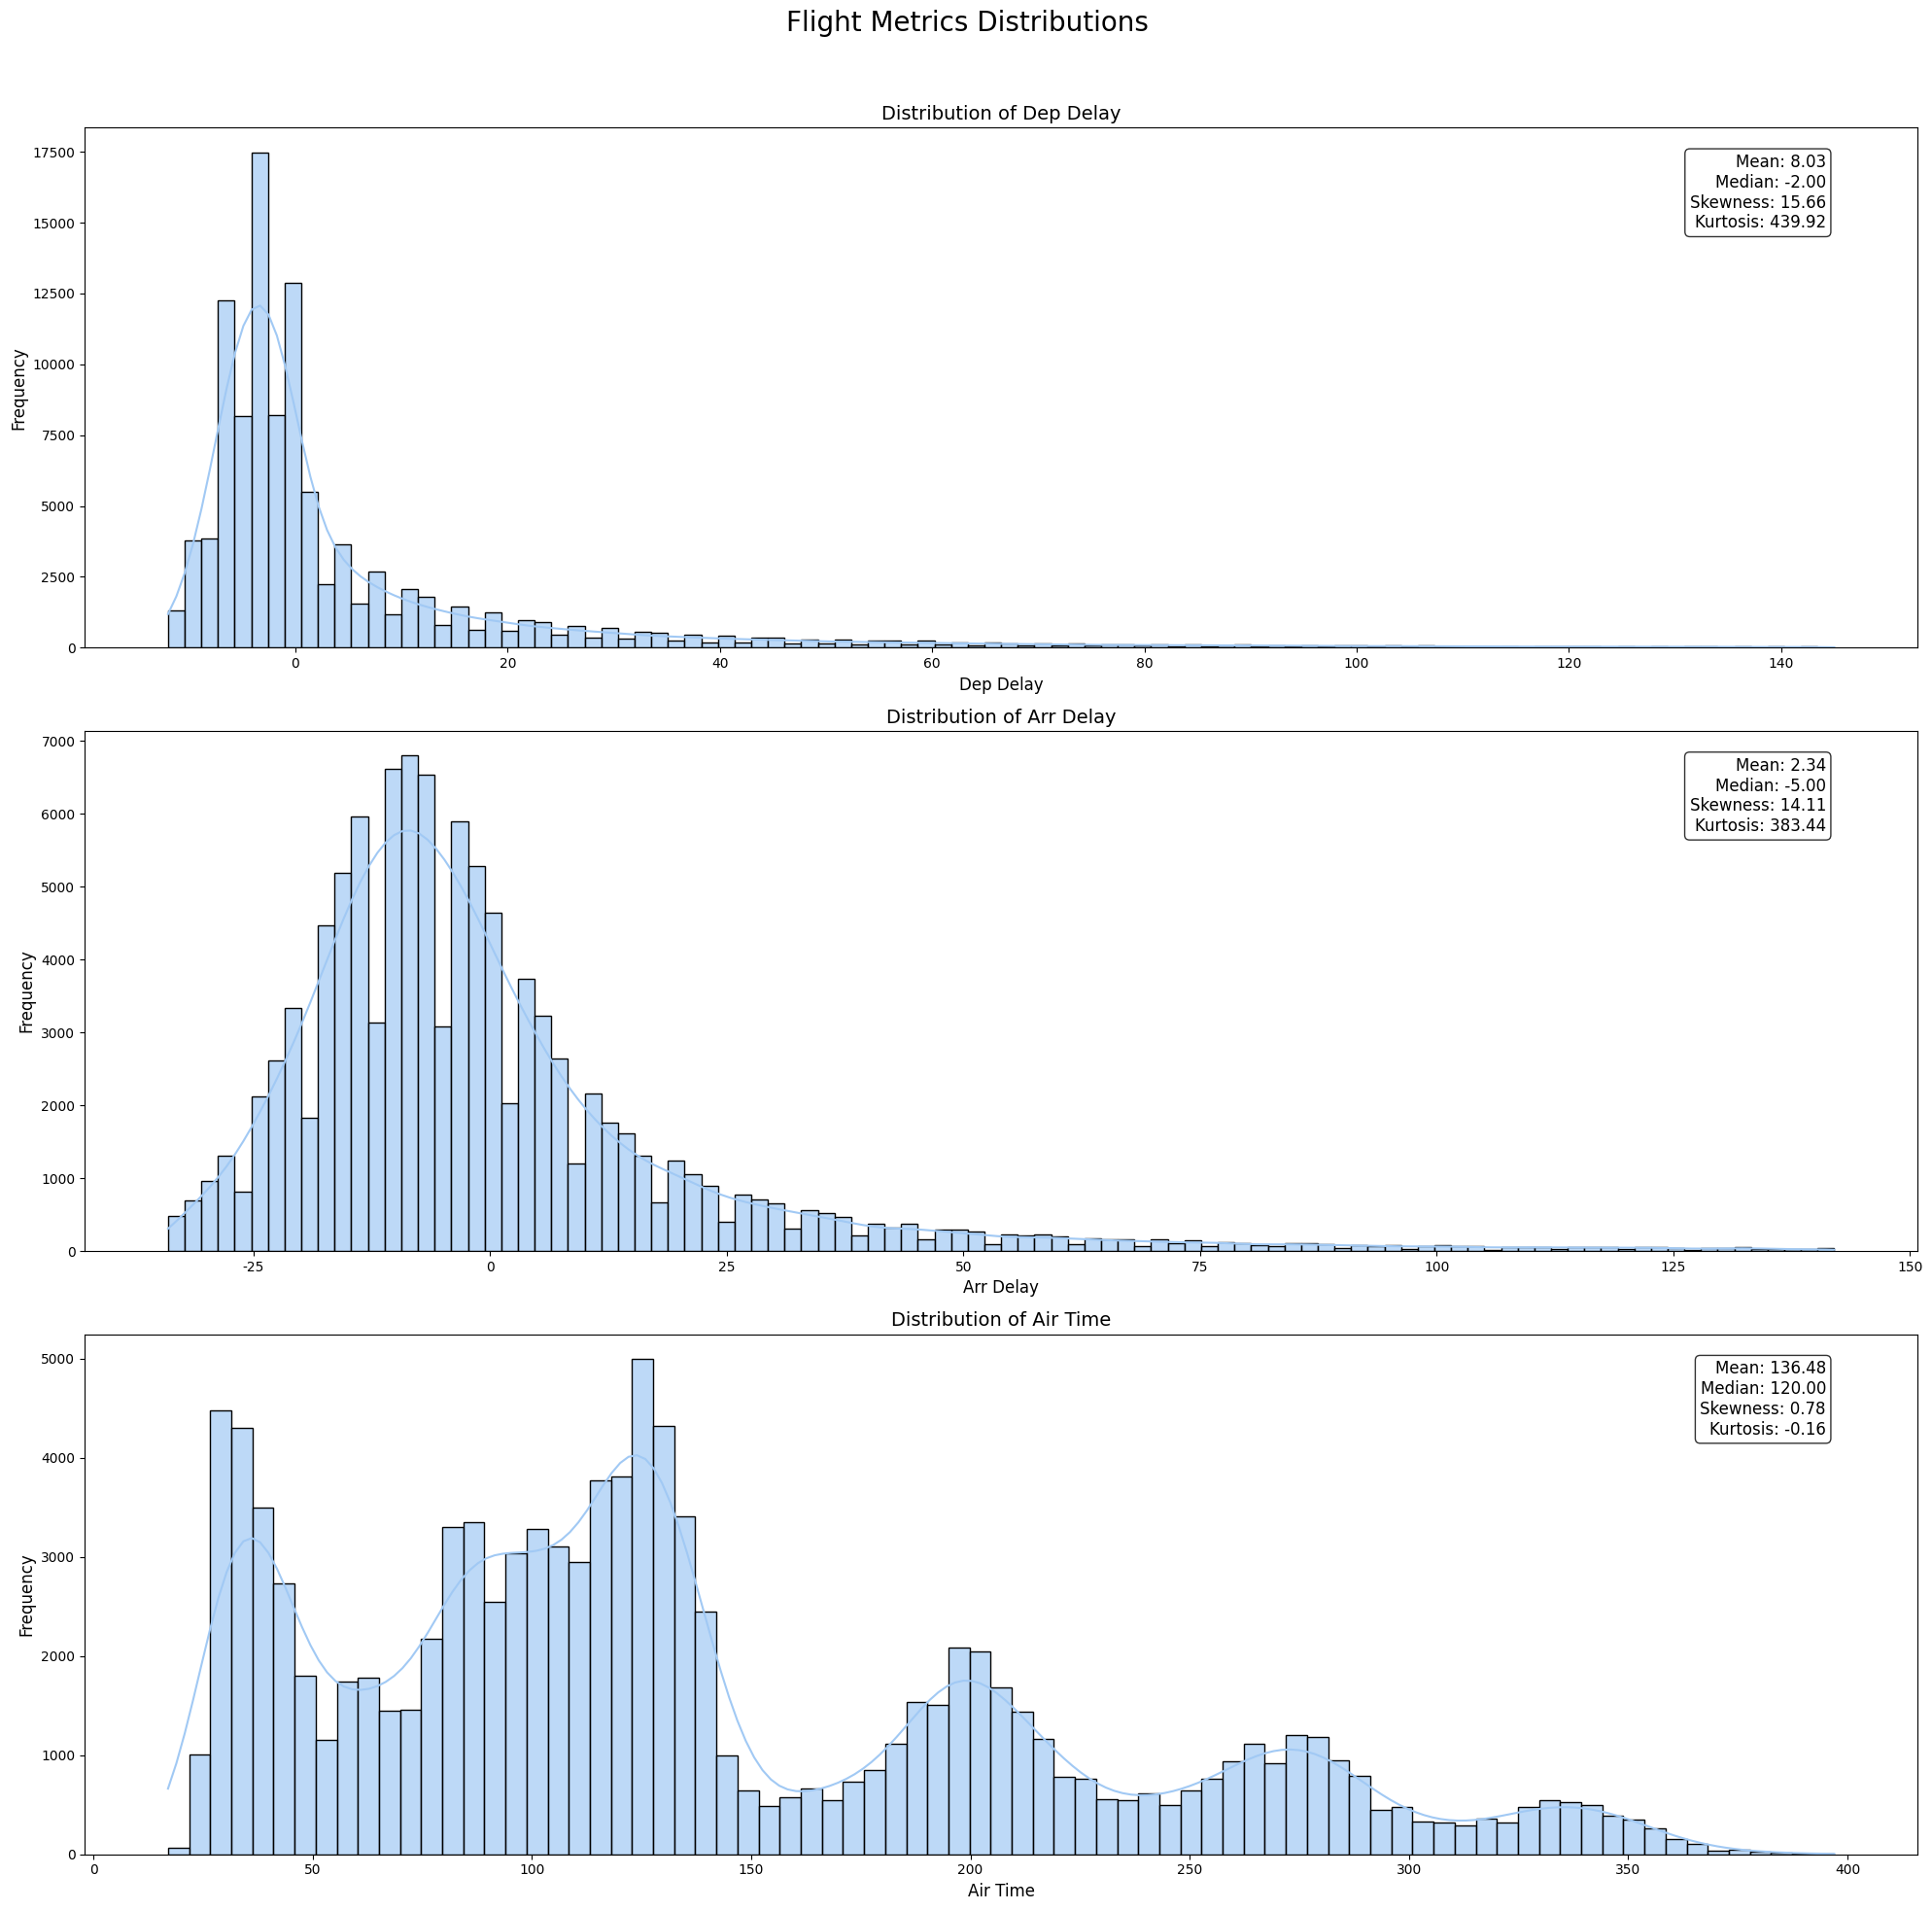

In [76]:
import seaborn as sns
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(20, 20))
plt.style.use('tableau-colorblind10')
sns.set_palette("pastel")

# List of variables to plot
variables = ['dep_delay', 'arr_delay', 'air_time']

# Create a 3x3 grid (with one extra subplot that we'll hide)
fig, axes = plt.subplots(3, 1, figsize=(20, 20))
axes = axes.flatten()


# Function to calculate optimal bin width using Freedman-Diaconis rule
def optimal_bins(data):
    # Handle extreme outliers for bin calculation
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    
    # Use Freedman-Diaconis rule for bin width
    bin_width = 2 * iqr * (len(data) ** (-1/3))
    
    if bin_width == 0:  # Handle cases where IQR is very small
        bin_width = 0.1 * np.std(data)
    
    # For very large ranges, cap the number of bins
    data_range = np.max(data) - np.min(data)
    num_bins = min(100, max(30, int(np.ceil(data_range / bin_width))))
    
    return num_bins

# Create histograms for each variable
for i, var in enumerate(variables):
    # Get data without NAs
    data = df[var].dropna()
    
    # Calculate optimal number of bins
    num_bins = optimal_bins(data)
    
    # Calculate key statistics
    median = data.median()
    mean = data.mean()
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # For heavily skewed variables, use percentile limits for better visualization
    if abs(skewness) > 2:
        p1, p99 = np.percentile(data, [1, 99])
        data_to_plot = data[(data >= p1) & (data <= p99)]
    else:
        data_to_plot = data
    
    # Plot the histogram with a density curve
    sns.histplot(data_to_plot, kde=True, bins=num_bins, ax=axes[i], 
                  alpha=0.7)
    
    # Add stats as text annotation
    stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
    axes[i].annotate(stats_text, xy=(0.95, 0.95), xycoords='axes fraction',
                     ha='right', va='top', fontsize=12,
                     bbox=dict(boxstyle='round', fc='white', alpha=0.8))
    
    # Set axis labels and title
    axes[i].set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}', fontsize=14)
    
    # Improve tick labels
    if var in ['dep_delay', 'arr_delay', 'duration_difference']:
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}" if x == int(x) else f"{x:.1f}"))

# Add an overall title
plt.suptitle('Flight Metrics Distributions', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 2000x2000 with 0 Axes>

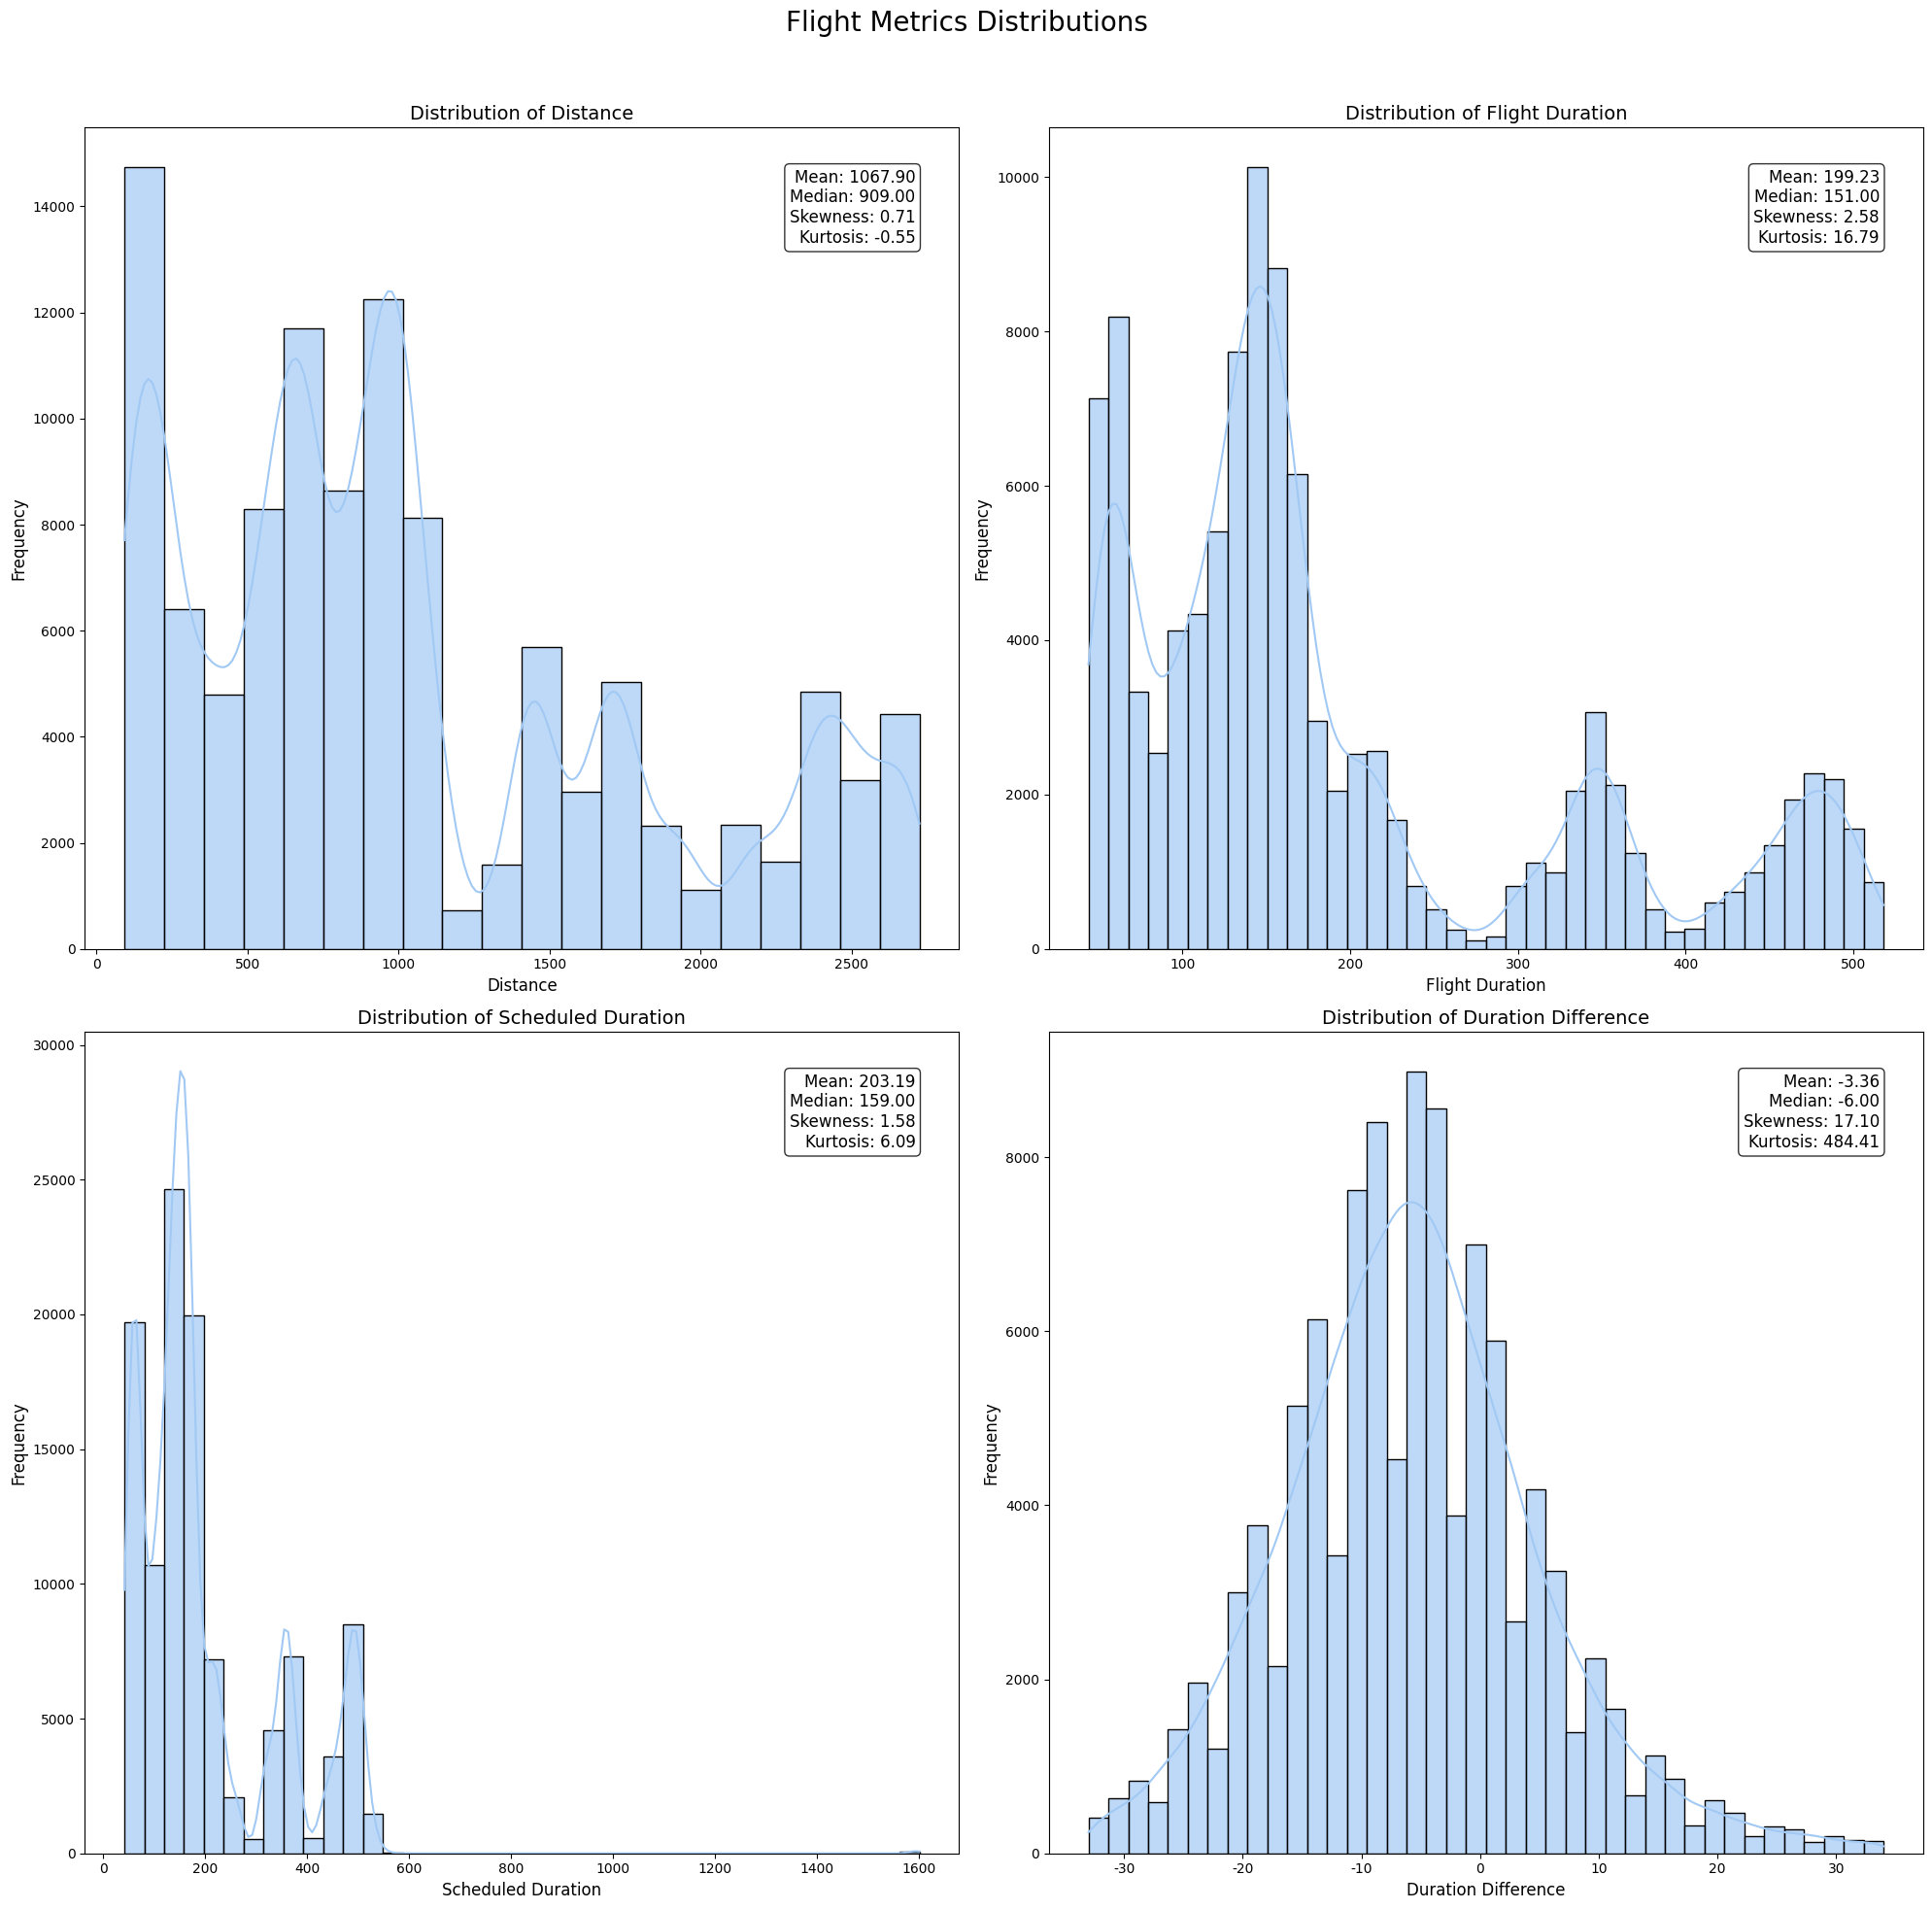

In [77]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(20, 20))
plt.style.use('tableau-colorblind10')
sns.set_palette("pastel")

# List of variables to plot
variables = ['distance', 'flight_duration', 'scheduled_duration', 'duration_difference']

# Create a 2x2 grid (with one extra subplot that we'll hide)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten()


# Create histograms for each variable
for i, var in enumerate(variables):
    # Get data without NAs
    data = df[var].dropna()
    
    # Calculate optimal number of bins
    if var == 'distance':
        num_bins = 20
    else:
        num_bins = 40
    
    # Calculate key statistics
    median = data.median()
    mean = data.mean()
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # For heavily skewed variables, use percentile limits for better visualization
    if abs(skewness) > 2:
        p1, p99 = np.percentile(data, [1, 99])
        data_to_plot = data[(data >= p1) & (data <= p99)]
    else:
        data_to_plot = data
    
    # Plot the histogram with a density curve
    sns.histplot(data_to_plot, kde=True, bins=num_bins, ax=axes[i], 
                  alpha=0.7)
    
    # Add stats as text annotation
    stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
    axes[i].annotate(stats_text, xy=(0.95, 0.95), xycoords='axes fraction',
                     ha='right', va='top', fontsize=12,
                     bbox=dict(boxstyle='round', fc='white', alpha=0.8))
    
    # Set axis labels and title
    axes[i].set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}', fontsize=14)
    
    # Improve tick labels
    if var in ['dep_delay', 'arr_delay', 'duration_difference']:
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}" if x == int(x) else f"{x:.1f}"))

# Add an overall title
plt.suptitle('Flight Metrics Distributions', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [78]:
variables = ['dep_delay', 'arr_delay', 'air_time', 'distance', 
             'flight_duration', 'scheduled_duration', 'duration_difference']


# Display summary statistics for these variables
stats_df = df[variables].describe().T
stats_df['skewness'] = df[variables].skew()
stats_df['kurtosis'] = df[variables].kurtosis()
display(stats_df.round(2))

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
dep_delay,108566.0,8.03,41.60,-36.0,-5.0,-2.0,6.0,2120.0,15.66,439.94
arr_delay,108332.0,2.34,43.00,-65.0,-14.0,-5.0,6.0,2098.0,14.11,383.46
air_time,108332.0,136.48,82.49,17.0,78.0,120.0,193.0,397.0,0.78,-0.16
distance,110878.0,1067.90,746.64,93.0,543.0,909.0,1542.0,2724.0,0.71,-0.55
flight_duration,108469.0,199.23,148.51,22.0,106.0,151.0,243.0,1948.0,2.58,16.79
scheduled_duration,110878.0,203.19,139.94,42.0,110.0,159.0,257.0,1601.0,1.58,6.09
duration_difference,108469.0,-3.36,63.41,-1447.0,-13.0,-6.0,1.0,1496.0,17.10,484.43


<Figure size 2000x2000 with 0 Axes>

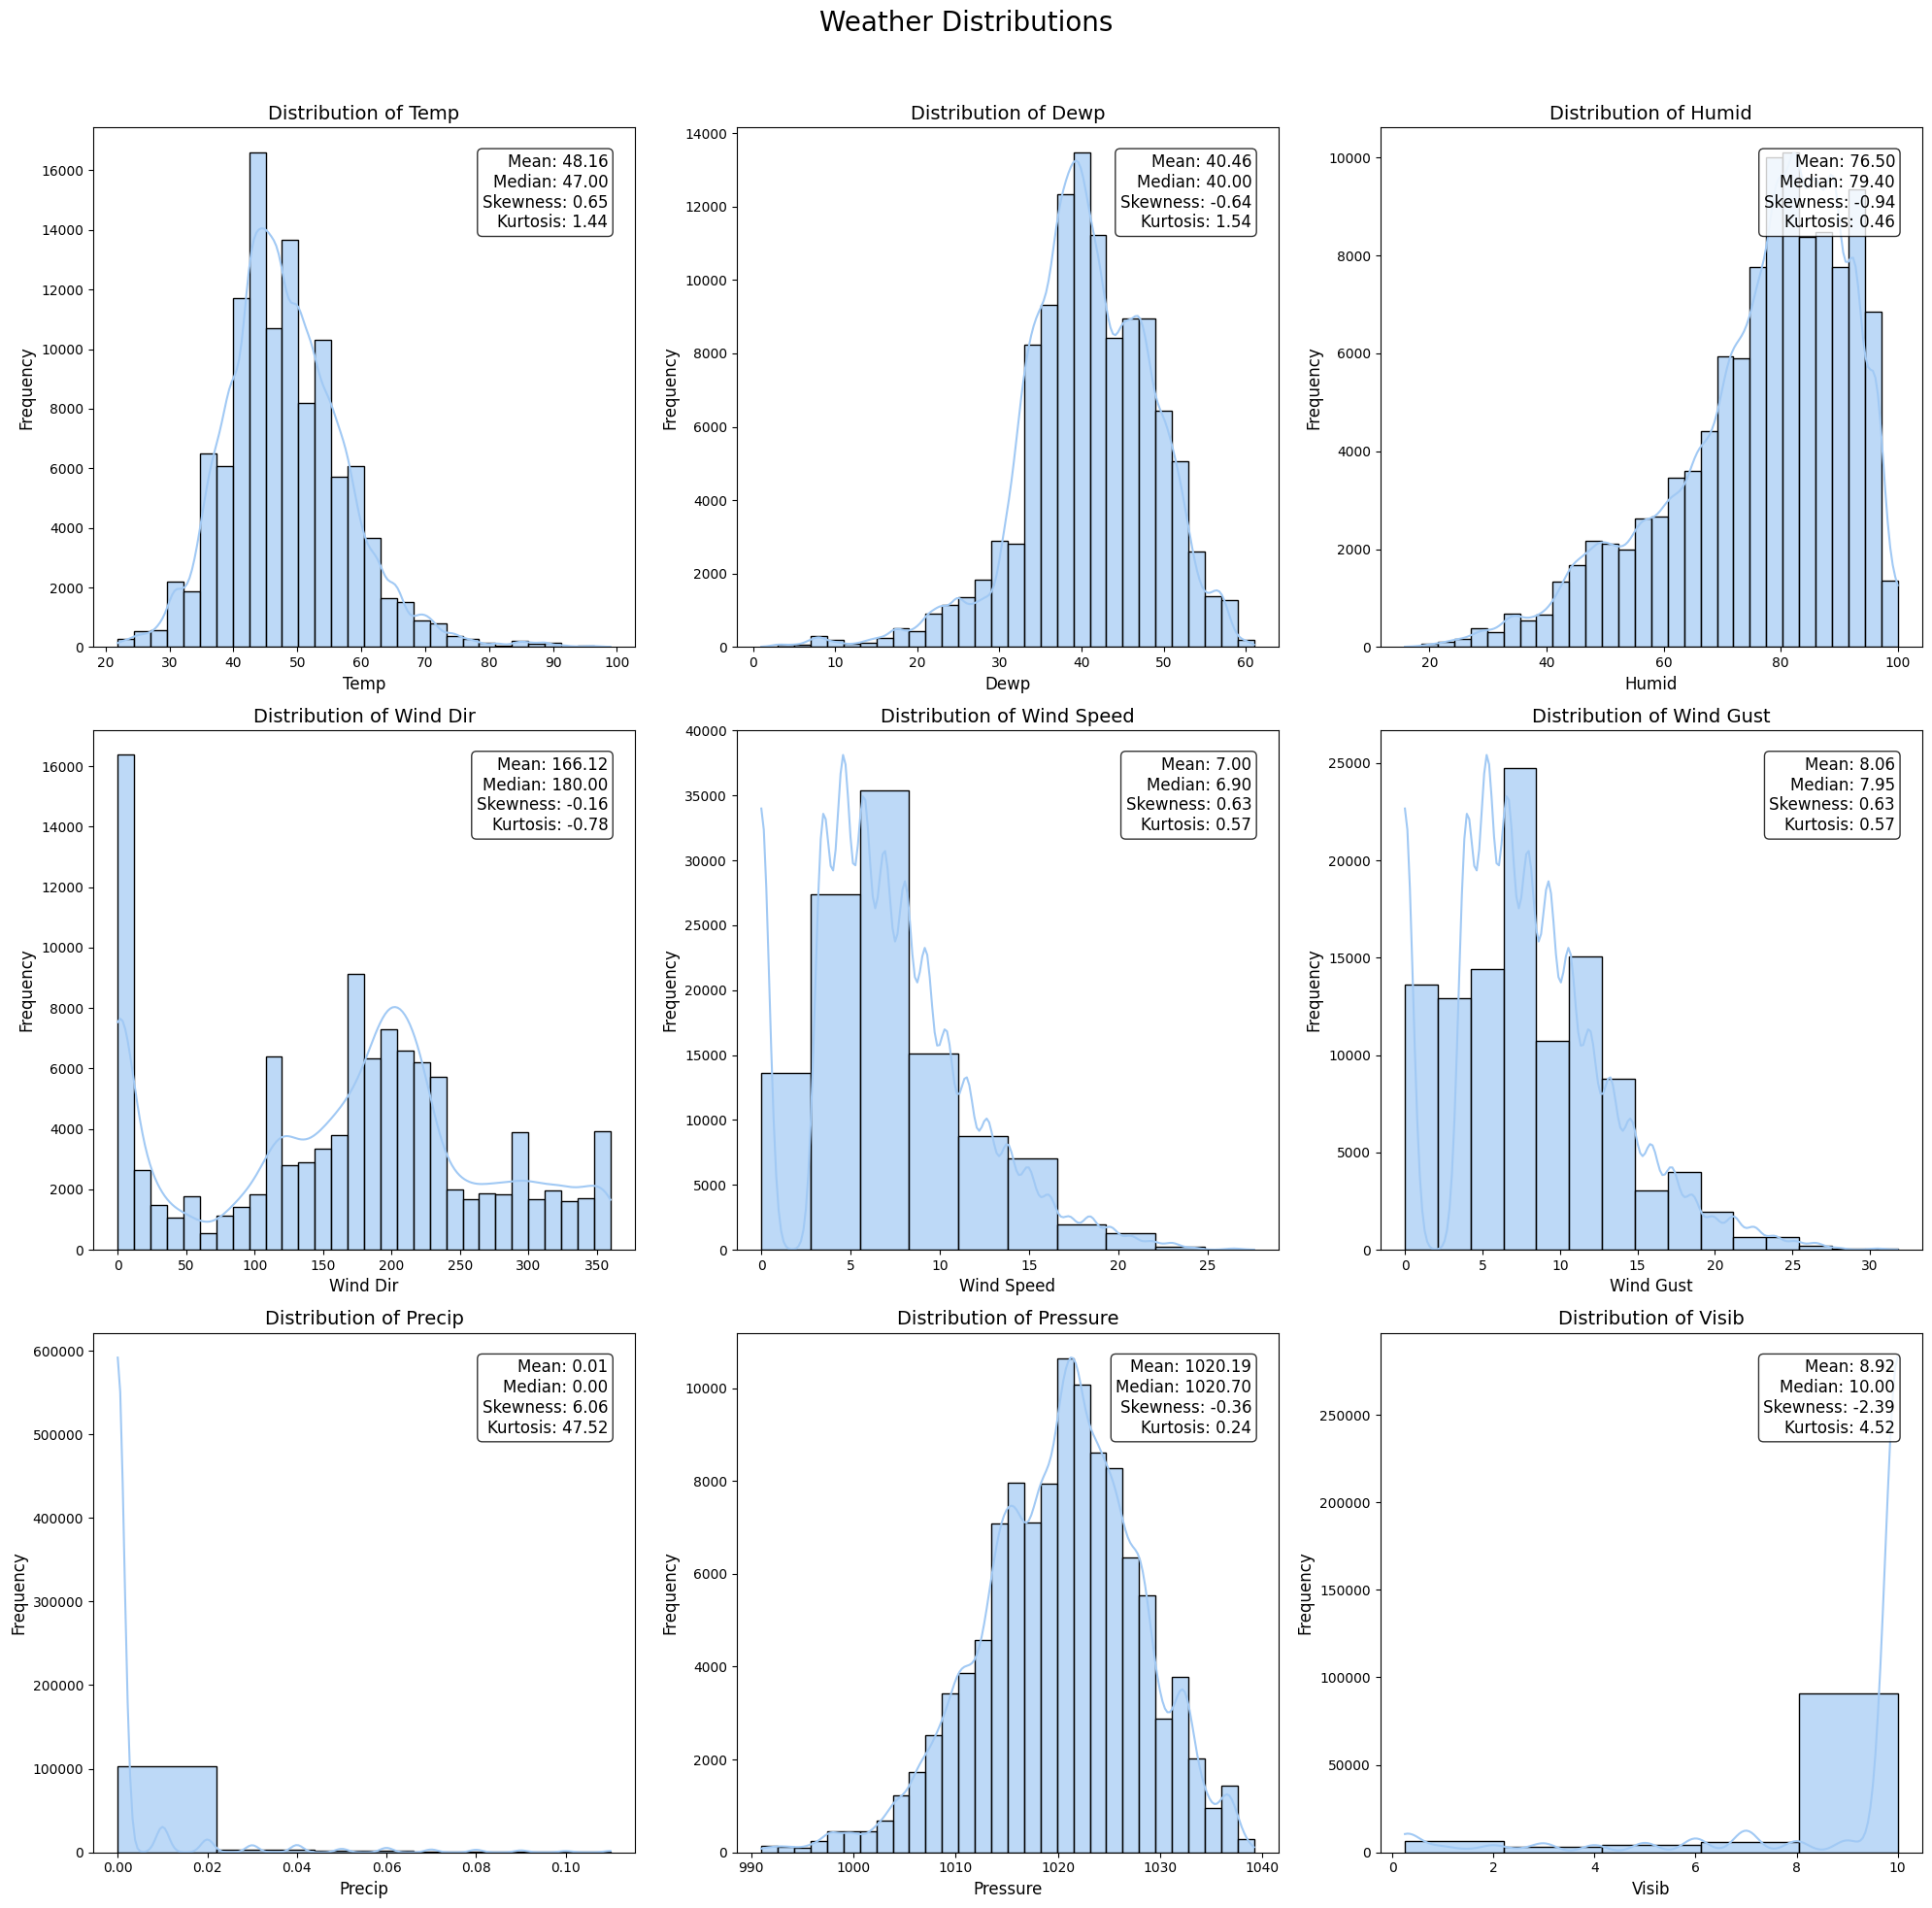

In [79]:


# Set figure size and style
plt.figure(figsize=(20, 20))
plt.style.use('tableau-colorblind10')
sns.set_palette("pastel")

# List of variables to plot
variables = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']

# Create a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()


# Create histograms for each variable
for i, var in enumerate(variables):
    # Get data without NAs
    data = df[var].dropna()
    
    # Calculate optimal number of bins
    if var == 'wind_speed':
        # For wind speed and gust, use fewer bins for better visibility
        num_bins = 10
    elif var == 'wind_gust':
        num_bins = 15
    elif var == 'visib':
        num_bins = 5

    elif var == 'precip':
        # For precipitation, use fewer bins for better visibility
        num_bins = 5
    else:
        num_bins = 30
    
    # Calculate key statistics
    median = data.median()
    mean = data.mean()
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # For heavily skewed variables, use percentile limits for better visualization
    if abs(skewness) > 2:
        p1, p99 = np.percentile(data, [1, 99])
        data_to_plot = data[(data >= p1) & (data <= p99)]
    else:
        data_to_plot = data
    
    # Plot the histogram with a density curve
    sns.histplot(data_to_plot, kde=True, bins=num_bins, ax=axes[i], 
                  alpha=0.7)
    
    # Add stats as text annotation
    stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
    axes[i].annotate(stats_text, xy=(0.95, 0.95), xycoords='axes fraction',
                     ha='right', va='top', fontsize=12,
                     bbox=dict(boxstyle='round', fc='white', alpha=0.8))
    
    # Set axis labels and title
    axes[i].set_xlabel(var.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}', fontsize=14)

# Add an overall title
plt.suptitle('Weather Distributions', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [80]:
variables = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']

# Display summary statistics for these variables
stats_df = df[variables].describe().T
stats_df['skewness'] = df[variables].skew()
stats_df['kurtosis'] = df[variables].kurtosis()
display(stats_df.round(2))

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
temp,110878.0,48.16,9.36,21.90,42.00,47.00,54.00,99.00,0.65,1.44
dewp,110878.0,40.46,7.97,1.00,36.00,40.00,46.00,61.00,-0.64,1.54
humid,110878.0,76.50,15.20,15.79,68.46,79.40,88.67,100.00,-0.94,0.46
wind_dir,110878.0,166.12,101.50,0.00,100.00,180.00,230.00,360.00,-0.16,-0.78
wind_speed,110878.0,7.00,4.51,0.00,4.60,6.90,9.21,27.62,0.63,0.57
wind_gust,110878.0,8.06,5.19,0.00,5.30,7.95,10.59,31.78,0.63,0.57
precip,110878.0,0.01,0.02,0.00,0.00,0.00,0.00,0.32,6.06,47.52
pressure,110878.0,1020.19,7.71,991.00,1015.20,1020.70,1025.50,1039.20,-0.36,0.24
visib,110878.0,8.92,2.54,0.00,10.00,10.00,10.00,10.00,-2.39,4.52


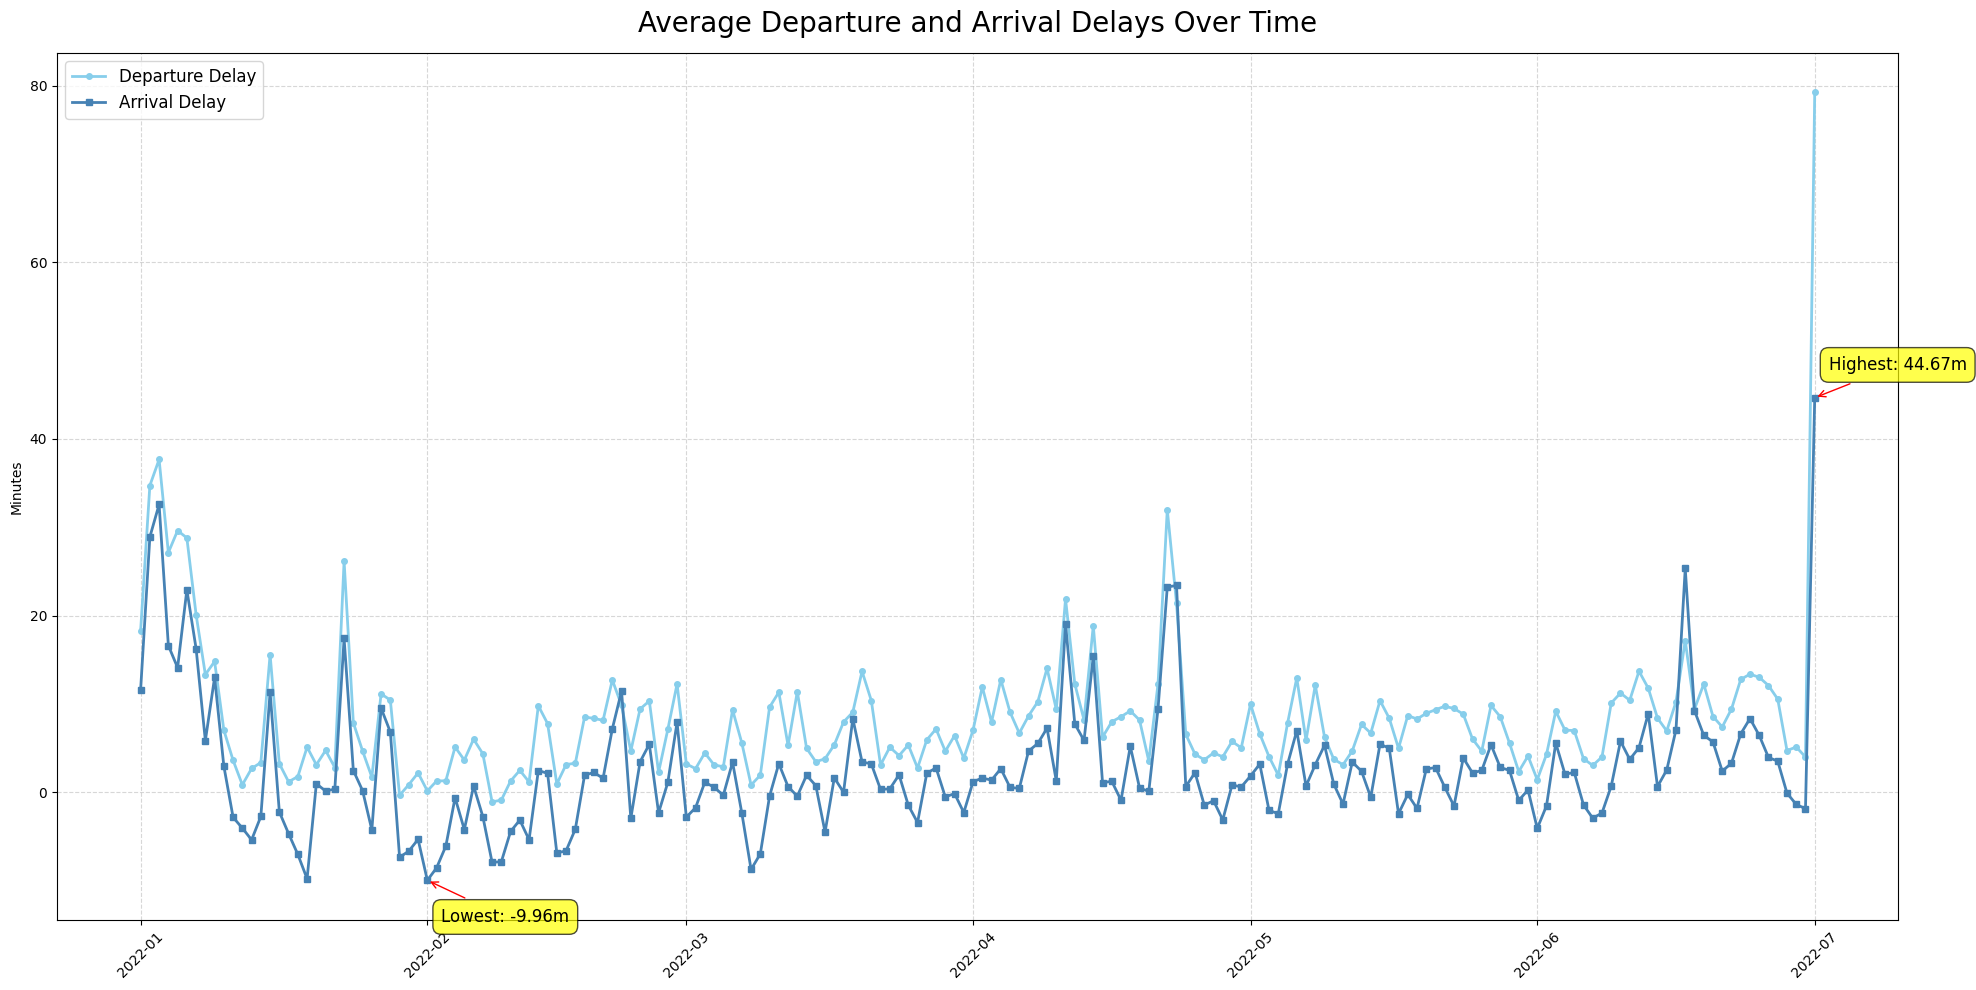

In [81]:
# Set figure size and style
plt.figure(figsize=(20, 10))
plt.style.use('tableau-colorblind10')

# Calculate average departure delays by departure date
dep_daily_avg = df.groupby(df['dep_time_datetime'].dt.date)['dep_delay'].mean().round(2).reset_index()
dep_daily_avg = dep_daily_avg.sort_values('dep_time_datetime')

# Calculate average arrival delays by arrival date
arr_daily_avg = df.groupby(df['arr_time_datetime'].dt.date)['arr_delay'].mean().round(2).reset_index()
arr_daily_avg = arr_daily_avg.sort_values('arr_time_datetime')

# Create the line chart
plt.plot(dep_daily_avg['dep_time_datetime'], dep_daily_avg['dep_delay'], 
         marker='o', linestyle='-', linewidth=2, markersize=4, 
         label='Departure Delay', color='skyblue')
plt.plot(arr_daily_avg['arr_time_datetime'], arr_daily_avg['arr_delay'], 
         marker='s', linestyle='-', linewidth=2, markersize=4, 
         label='Arrival Delay', color='steelblue')

# Add labels and title
plt.title('Average Departure and Arrival Delays Over Time', fontsize=20, pad=15)
plt.ylabel('Minutes')

# Find highest and lowest arrival delays
max_arr = arr_daily_avg.loc[arr_daily_avg['arr_delay'].idxmax()]
min_arr = arr_daily_avg.loc[arr_daily_avg['arr_delay'].idxmin()]

# Add annotation for highest arrival delay
plt.annotate(f"Highest: {max_arr['arr_delay']}m",
             xy=(max_arr['arr_time_datetime'], max_arr['arr_delay']),
             xytext=(10, 20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

# Add annotation for lowest arrival delay
plt.annotate(f"Lowest: {min_arr['arr_delay']}m",
             xy=(min_arr['arr_time_datetime'], min_arr['arr_delay']),
             xytext=(10, -30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()

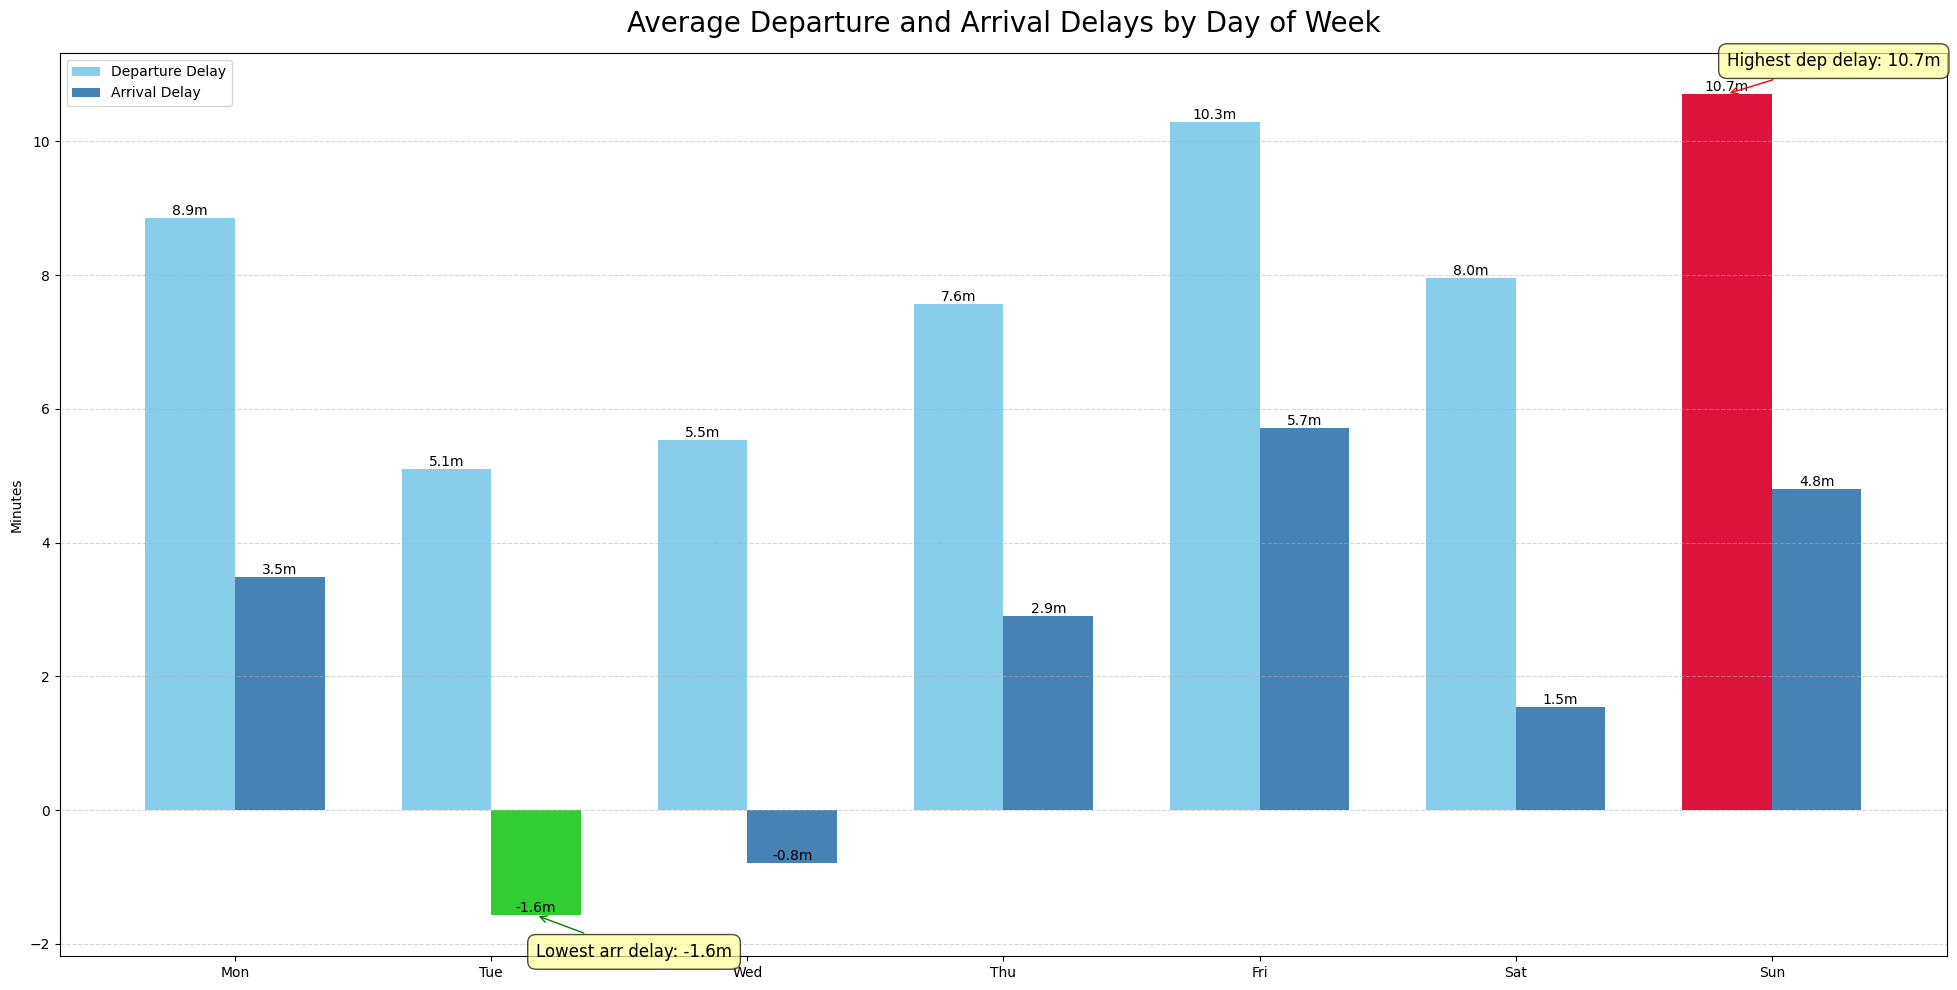

In [82]:
# Set figure size and style
plt.figure(figsize=(20, 10))
plt.style.use('tableau-colorblind10')

# Calculate average delays by day of week
avg_dep_delay = df.groupby('day_of_week')['dep_delay'].mean().round(2)
avg_arr_delay = df.groupby('day_of_week')['arr_delay'].mean().round(2)

# Find indices for highest dep delay and lowest arr delay
max_dep_idx = avg_dep_delay.idxmax()
min_arr_idx = avg_arr_delay.idxmin()

# Convert day indices to numeric positions for the chart
max_dep_pos = list(avg_dep_delay.index).index(max_dep_idx)
min_arr_pos = list(avg_arr_delay.index).index(min_arr_idx)

# Set up the bar positions
x = np.arange(len(avg_dep_delay))
width = 0.35

# Create colors for the bars
dep_colors = ['skyblue'] * len(avg_dep_delay)
dep_colors[max_dep_pos] = 'crimson'  # Highlight highest departure delay

arr_colors = ['steelblue'] * len(avg_arr_delay)
arr_colors[min_arr_pos] = 'limegreen'  # Highlight lowest arrival delay

# Create the bar chart with custom colors
plt.bar(x - width/2, avg_dep_delay, width, label='Departure Delay', color=dep_colors)
plt.bar(x + width/2, avg_arr_delay, width, label='Arrival Delay', color=arr_colors)

# Add labels and title
plt.title('Average Departure and Arrival Delays by Day of Week', fontsize=20, pad=15)
plt.ylabel('Minutes')
plt.xticks(x, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Add value labels on the bars
for i, (dep, arr) in enumerate(zip(avg_dep_delay, avg_arr_delay)):
    plt.text(i - width/2, dep, f'{dep:.1f}m', ha='center', va='bottom')
    plt.text(i + width/2, arr, f'{arr:.1f}m', ha='center', va='bottom')

# Add annotations for highest departure delay
plt.annotate(f"Highest dep delay: {avg_dep_delay[max_dep_idx]:.1f}m",
             xy=(max_dep_pos - width/2, avg_dep_delay[max_dep_idx]),
             xytext=(0, 20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFF99', alpha=0.7))

# Add annotations for lowest arrival delay
plt.annotate(f"Lowest arr delay: {avg_arr_delay[min_arr_idx]:.1f}m",
             xy=(min_arr_pos + width/2, avg_arr_delay[min_arr_idx]),
             xytext=(0, -30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='#FFFF99', alpha=0.7))

plt.tight_layout()

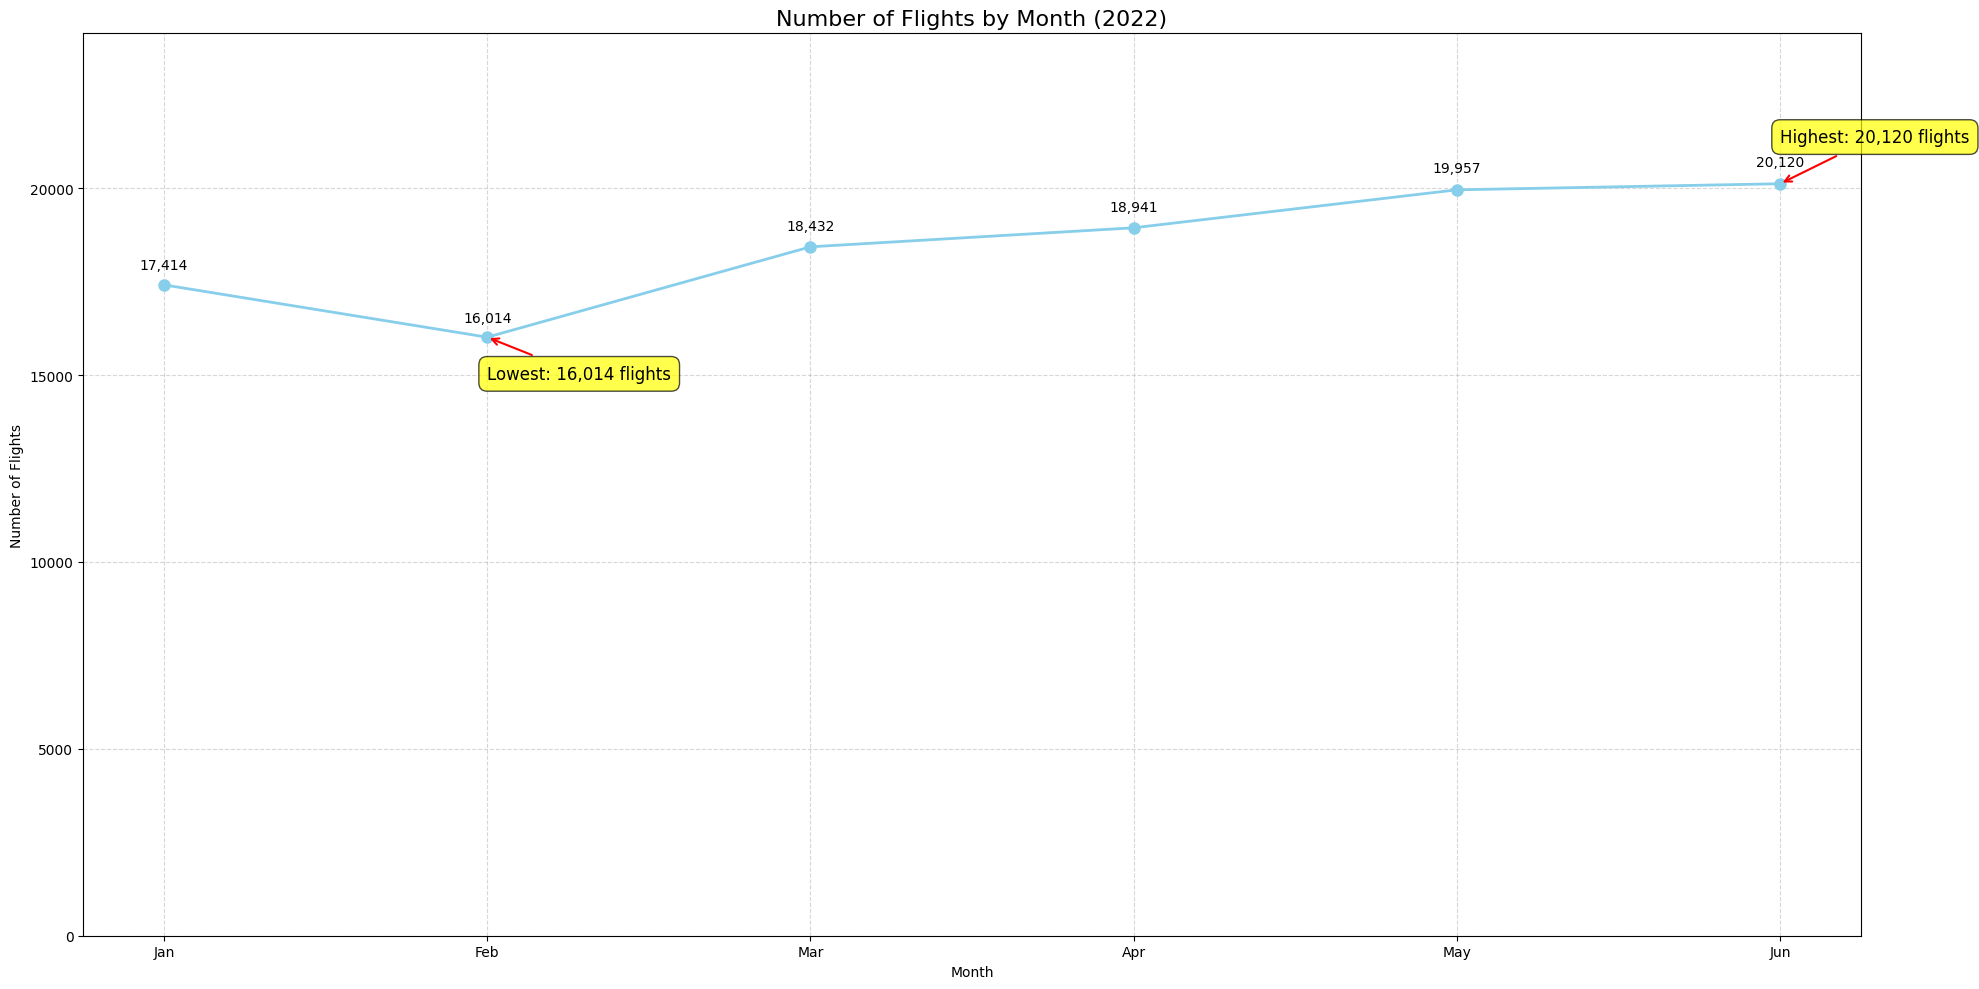

In [83]:
# Set figure size and style
plt.figure(figsize=(20, 10))
plt.style.use('tableau-colorblind10')

# 1. Number of Flights Distribution for Each Month (Line Chart)
monthly_flights = df.groupby('month').size()
plt.plot(monthly_flights.index, monthly_flights, marker='o', linestyle='-', 
         linewidth=2, markersize=8, color='skyblue')
plt.title('Number of Flights by Month (2022)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(range(1, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.grid(True, linestyle='--', alpha=0.5)

# Add value labels at each point
for i, v in enumerate(monthly_flights):
    plt.text(monthly_flights.index[i], v + (v * 0.02), f'{v:,}', 
             ha='center', va='bottom')

# Find highest and lowest points
max_flights_idx = monthly_flights.idxmax()
max_flights = monthly_flights[max_flights_idx]
min_flights_idx = monthly_flights.idxmin()
min_flights = monthly_flights[min_flights_idx]

# Add annotation for highest number of flights
plt.annotate(f"Highest: {max_flights:,} flights",
             xy=(max_flights_idx, max_flights),
             xytext=(0, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

# Add annotation for lowest number of flights
plt.annotate(f"Lowest: {min_flights:,} flights",
             xy=(min_flights_idx, min_flights),
             xytext=(0, -30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7))

# Set proper y-axis limits to leave room for labels
plt.ylim(0, max(monthly_flights) * 1.2)  # Increased to make room for annotations

plt.tight_layout()

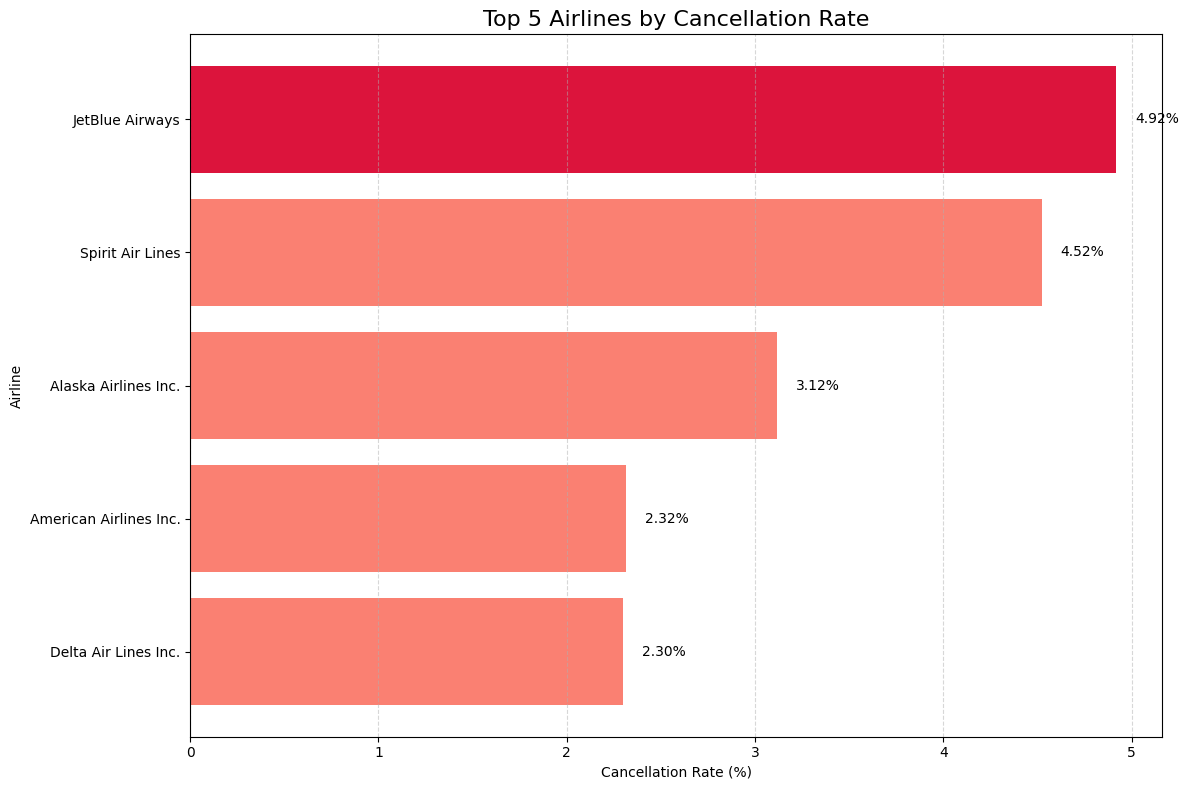

In [84]:
# Set figure size and style
plt.figure(figsize=(12, 8))
plt.style.use('tableau-colorblind10')

# Calculate cancellation rate for each airline
airline_cancel_rate = df.groupby('airline')['cancel'].mean() * 100

# Get top 5 airlines by cancellation rate and sort them (ascending=True for horizontal bars)
top_5_cancel = airline_cancel_rate.sort_values(ascending=False).head(5).sort_values(ascending=True)

# Find the highest cancellation rate airline
max_airline = top_5_cancel.idxmax()
max_idx = list(top_5_cancel.index).index(max_airline)

# Create colors list - default salmon but attention-grabbing red for the highest
colors = ['salmon'] * len(top_5_cancel)
colors[max_idx] = 'crimson'  # Deep red color that draws attention

# Create horizontal bar chart with custom colors
bars = plt.barh(range(len(top_5_cancel)), top_5_cancel, color=colors)
plt.yticks(range(len(top_5_cancel)), top_5_cancel.index)
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Airline')
plt.title('Top 5 Airlines by Cancellation Rate', fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center')

plt.tight_layout()

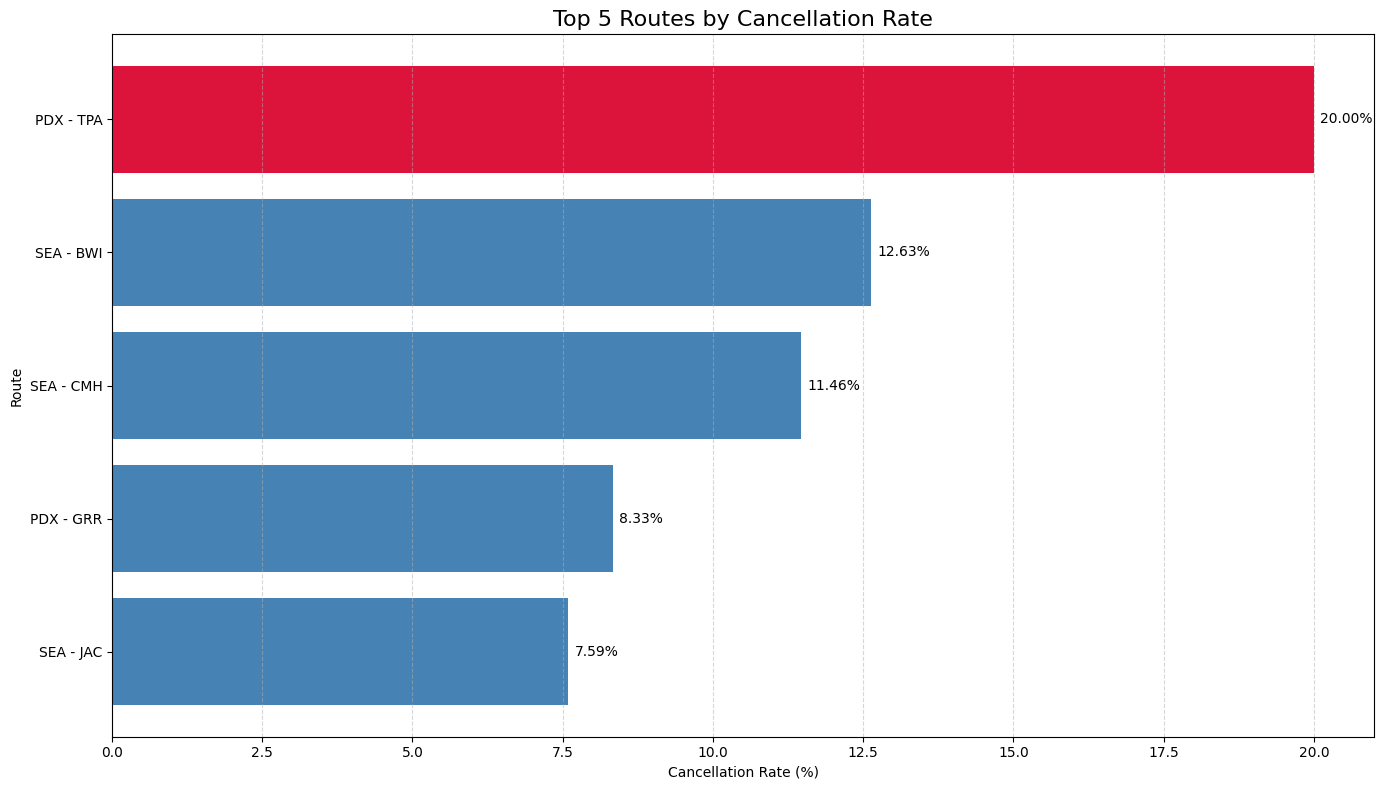

In [85]:
# Set figure size and style
plt.figure(figsize=(14, 8))
plt.style.use('tableau-colorblind10')

# Calculate cancellation rate for each route
route_cancel_rate = df.groupby('route')['cancel'].mean() * 100

# Get top 5 routes by cancellation rate and sort them (ascending=True for horizontal bars)
top_5_routes = route_cancel_rate.sort_values(ascending=False).head(5).sort_values(ascending=True)

# Find the highest cancellation rate route
max_route = top_5_routes.idxmax()
max_idx = list(top_5_routes.index).index(max_route)

# Create colors list - default blue but attention-grabbing red for the highest
colors = ['steelblue'] * len(top_5_routes)
colors[max_idx] = 'crimson'  # Deep red color that draws attention

# Create horizontal bar chart with custom colors
bars = plt.barh(range(len(top_5_routes)), top_5_routes, color=colors)
plt.yticks(range(len(top_5_routes)), top_5_routes.index)
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Route')
plt.title('Top 5 Routes by Cancellation Rate', fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center')

plt.tight_layout()

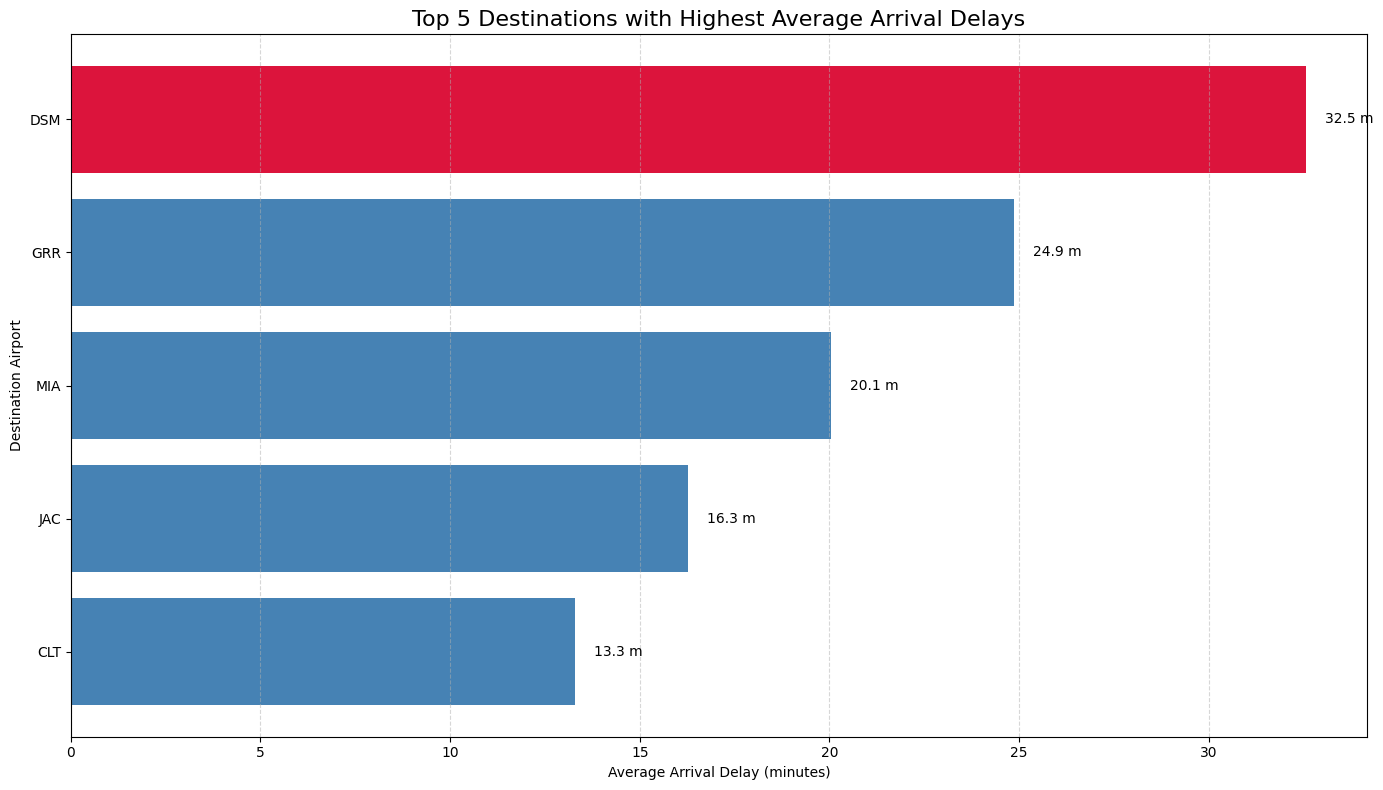

In [86]:
# Set figure size and style
plt.figure(figsize=(14, 8))
plt.style.use('tableau-colorblind10')

# Calculate average arrival delay for each destination
avg_delay_by_dest = df.groupby('dest')['arr_delay'].mean().round(2)

# Get top 5 destinations by average arrival delay and sort them
top_5_delays = avg_delay_by_dest.sort_values(ascending=False).head(5).sort_values(ascending=True)

# Find the highest average delay destination
max_dest = top_5_delays.idxmax()
max_idx = list(top_5_delays.index).index(max_dest)

# Create colors list - default blue but attention-grabbing red for the highest
colors = ['steelblue'] * len(top_5_delays)
colors[max_idx] = 'crimson'  # Deep red color that draws attention

# Create horizontal bar chart with custom colors
bars = plt.barh(range(len(top_5_delays)), top_5_delays, color=colors)
plt.yticks(range(len(top_5_delays)), top_5_delays.index)
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Destination Airport')
plt.title('Top 5 Destinations with Highest Average Arrival Delays', fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f} m', va='center')

plt.tight_layout()

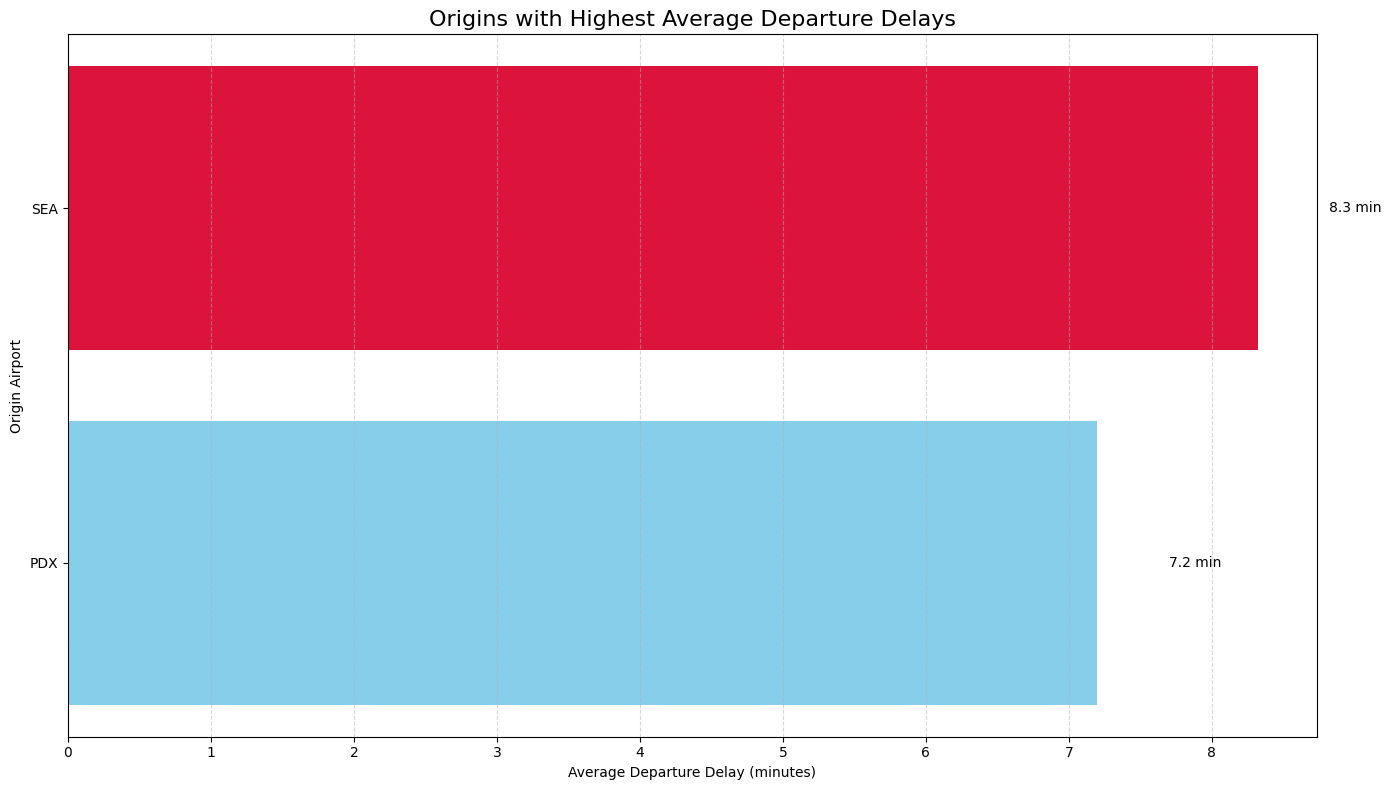

In [87]:
# Set figure size and style
plt.figure(figsize=(14, 8))
plt.style.use('tableau-colorblind10')

# Calculate average departure delay for each origin

avg_delay_by_origin = df.groupby('origin')['dep_delay'].mean().round(2)

# Get top 5 origins by average departure delay and sort them
top_5_delays = avg_delay_by_origin.sort_values(ascending=False).head(5).sort_values(ascending=True)

# Find the highest average delay origin
max_origin = top_5_delays.idxmax()
max_idx = list(top_5_delays.index).index(max_origin)

# Create colors list - default blue but attention-grabbing red for the highest
colors = ['skyblue'] * len(top_5_delays)
colors[max_idx] = 'crimson'  # Deep red color that draws attention

# Create horizontal bar chart with custom colors
bars = plt.barh(range(len(top_5_delays)), top_5_delays, color=colors)
plt.yticks(range(len(top_5_delays)), top_5_delays.index)
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Origin Airport')
plt.title('Origins with Highest Average Departure Delays', fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f} min', va='center')

plt.tight_layout()

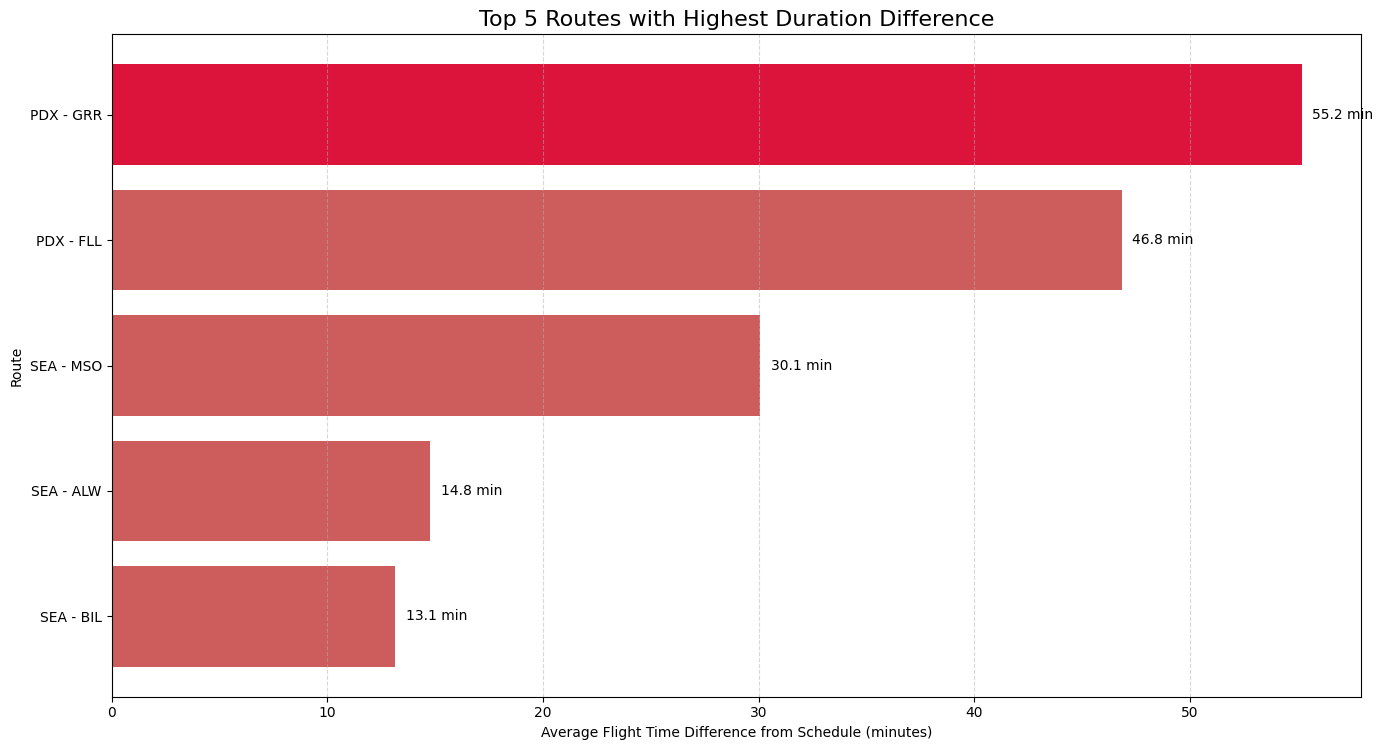

In [95]:
# Set figure size and style
plt.figure(figsize=(14, 8))
plt.style.use('tableau-colorblind10')


# Filter for valid duration_difference values and routes with minimum 20 flights
valid_flights = df[df['duration_difference'].notna()]


# Calculate average duration difference for each route
avg_diff_by_route = valid_flights.groupby('route')['duration_difference'].mean().round(2)

# Get top 5 routes by absolute duration difference (can be positive or negative)
top_5_diff = avg_diff_by_route.sort_values(ascending=False).head(5)
top_5_routes = avg_diff_by_route[top_5_diff.index].sort_values(ascending=True)

# Find the route with the highest absolute difference
max_route = top_5_routes.abs().idxmax()
max_idx = list(top_5_routes.index).index(max_route)

# Create colors list - use different colors for positive and negative differences
colors = ['indianred' if val > 0 else 'mediumseagreen' for val in top_5_routes]
# Make the highest absolute difference crimson
colors[max_idx] = 'crimson' if top_5_routes[max_route] > 0 else 'darkgreen'

# Create horizontal bar chart with custom colors
bars = plt.barh(range(len(top_5_routes)), top_5_routes, color=colors)
plt.yticks(range(len(top_5_routes)), top_5_routes.index)
plt.xlabel('Average Flight Time Difference from Schedule (minutes)')
plt.ylabel('Route')
plt.title('Top 5 Routes with Highest Duration Difference', fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5 if width >= 0 else width - 2, 
             bar.get_y() + bar.get_height()/2,
             f'{width:.1f} min', va='center',
             ha='left' if width >= 0 else 'right')


plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make room for the note

In [ ]:
# Add a note explaining the meaning of positive/negative values
plt.figtext(0.5, 0.01, 
            'Positive values: Actual flight time longer than scheduled\n'
            'Negative values: Actual flight time shorter than scheduled', 
            ha='center', fontsize=10, bbox=dict(facecolor='lightyellow', alpha=0.5))


In [89]:
# def detect_outliers_iqr(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
#     return outliers
# len(detect_outliers_iqr(df['precip']))

Model Training 

In [93]:
# Selecting features and target variable
X = df[["distance", "temp", "dewp", "humid", "pressure","precip", "visib"]]
Y = df["cancel"]

#"month", "day", "sched_dep_time"

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = gnb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generating the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(X)


Accuracy: 0.9596861471861472
Confusion Matrix:
[[21256   454]
 [  440    26]]
        distance  temp  dewp  humid  pressure  precip  visib
0           1874  33.0  23.0  66.06    1022.9     0.0   10.0
1           1533  32.0  23.0  69.04    1023.4     0.0   10.0
2           2182  33.0  23.0  66.06    1022.9     0.0   10.0
3           1721  33.0  23.0  66.06    1022.9     0.0   10.0
4           1739  33.0  19.0  55.75    1025.1     0.0   10.0
...          ...   ...   ...    ...       ...     ...    ...
111001      1660  56.0  51.0  83.88    1021.5     0.0   10.0
111002       748  60.0  53.0  77.65    1021.9     0.0   10.0
111003      1024  65.0  53.0  65.56    1021.3     0.0   10.0
111004      1024  56.0  51.0  83.88    1021.5     0.0   10.0
111005       512  56.0  50.0  80.52    1021.8     0.0   10.0

[110878 rows x 7 columns]


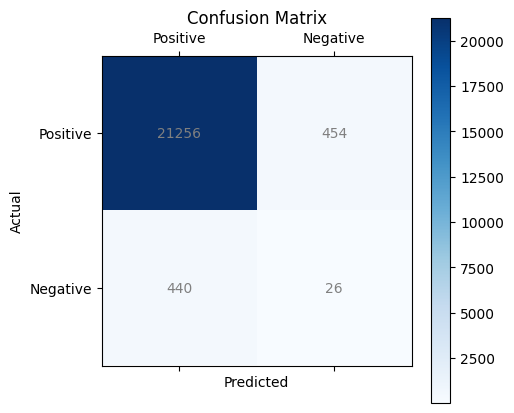

In [94]:
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Explicitly set the tick positions
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))

# Then, set the tick labels
ax.set_xticklabels(["Positive", "Negative"])
ax.set_yticklabels(["Positive", "Negative"])

# Display the numbers on the colors
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha="center", va="center", color="Grey")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()